# CRISP-DM Model with Titanic Dataset

I will create small-scale CRISP-DM and data-based project.

Here is presented "the basic flow" of the project:

1. Loading **Titanic** dataset, and 
2. then extracting more information of the dataset and 
3. visualizing the results.
4. few Machine Learning models are applied to the dataset and 
5. the results of Machine Learning models are compared.


## Phase 1: Business Understanding

RMS Titanic was passenger boat that sank 15 april 1912 after striking an iceberg. In the boat was aboard 2224 passengers and estimated 1500 died. Titanic dataset contains passengers data from allmost 900 passengers.

**Project objectives and success criteria**

I want to create a model that shows what percentage chances passengers with certain characteristics have to survive an accident.

The model can be used to find out who had the worst and, on the other hand, the best chances of surviving the accident. In addition, it is possible to assess what kind of chances you or our family had to survive the most destructive marine accident in history.

## Phase 2: Data Understanding

In the "Data Understanding" phase I aim to get a grasp of Titanic dataset and its characteristics.

Things what I will do in this phase:

1. Get familiar with structure of dataset. Understand the dataset's structure like the number of features (columns), the data types of each feature, and the size of the dataset.
2. Summary Statistics. Calculate summary statistics for numerical features, such as mean, median etc.
3. Missing values. Identify the missing values of the dataset.
4. Data Visualization: Create data visualizations to gain insights of the Data.
5. Outlier Detection: Identify and examine potential outliers. You can use chart types like box plots or scatter plots to visualize outliers.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

# Some warnings can be ignored in the produced notebook.
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

###  2.1 Structure of dataset

Load Titanic dataset file and then show few lines data and information of column types.

In [2]:
file_name = 'data/titanic.csv'
df = pd.read_csv(file_name)

In [3]:
display(df.head(3))
display(df.tail(3))
df.info()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### 2.1.1 Notes on data structure

Every row represents one passenger. There is 891 rows of data.
It has 12 different columns which are explained below.

|Column|Explanation|Values|
|-----|------|-----|
|PassengerId|Number of passenger in dataset|ascending numbering 1 -> 891|
|Survived|Survived from the accident or not|(0 = No; 1 = Yes)|
|Pclass|Passenger Class|(1 = 1st; 2 = 2nd; 3 = 3rd)|
|Name|Family name, firstname |Individual|
|Sex|Gender|male or female|
|Age|Passengers age |Individual|
|SibSp|Number of Siblings/Spouses Aboard|Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic|
|Parch|Number of Parents/Children Aboard|Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)|
|Ticket|Ticket Number|Individual|
|Fare|Passenger Fare|British pound|
|Cabin|Cabin number/code||
|Embarked|Port of Embarkation|(C = Cherbourg; Q = Queenstown; S = Southampton)|

The source of the information presented above. https://campus.lakeforest.edu/frank/FILES/MLFfiles/Bio150/Titanic/TitanicMETA.pdf

### 2.2 Summary of statistics
Show basic summary of the dataset.

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


As we see passengers are relatively young. According to this dataset, the average passenger age is 29.7 years. Youngest passenger is baby under 6 months and oldest is 80 year old.

Average of the survived column is 0.38. This means that there were more dead than survivors in the accident.

### 2.3 Missing values
Calculate Missing values

Count NaN values in each column.

In [5]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

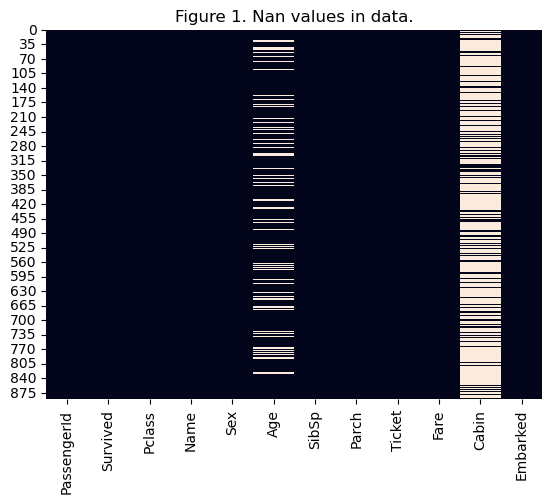

In [6]:
sns.heatmap(df.isna(), cbar=False)
plt.title('Figure 1. Nan values in data.')
plt.show()

Mostly nans area in Cabin and Age columns. There is also two nans in Embarked column.

### 2.4 Visualization
Visualize survivors, passenger ages, survival rate of passengers with differen features.

Visualization is made for many features. First I show count of people with certain feature and right after that is shown how that feature affected to survival rate.

* the count of survivors.
* the distribution of passenger ages and how different age bins survived.
* the count and survival rate by passenger class.
* the count and survival rate by gender.
* the survival rate by passenger class and gender.
* the distribution of ticket fares and how passengers with different ticket fare bins survived
* the count and survival rate by sibling and spouses.
* the count and survival rate by parents and childrens.

After visualization, you should understand how passengers are distributed by age, socio-economic background and family size. In addition you should understand roughly what kind of effects they had on the chances of survival.

*Note for the count of passengers. At this point, reader must remeber that dataset represent only about third of all passengers. So counts are not the factual information about all passengers of Titanic sink.*

#### 2.4.1 The count of survivors

Not survived    549
Survived        342
Name: count, dtype: int64


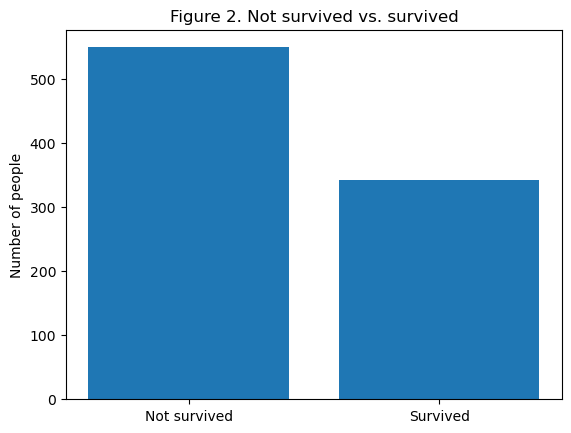

In [7]:
# Count dead and survivors to new dataframe.
df_survived = df['Survived'].value_counts()
# Change index names
df_survived.index = ['Not survived','Survived']
print(df_survived)

# barplot from survivors and dead
plt.bar(df_survived.index, df_survived)
plt.ylabel('Number of people')
plt.title('Figure 2. Not survived vs. survived')

plt.show()

#### 2.4.2 Passenger ages

What is the distribution of passenger ages and how does age affect on the survival rate?

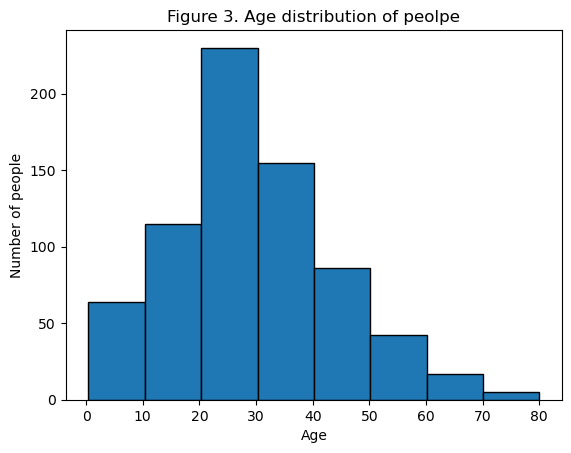

In [8]:
# Age distribution of people.

# Age of passengers is distributed from 0 - 80 years. Lets plot a barplot with 8 bars.
plt.hist(df['Age'], bins=8, edgecolor='k')

plt.xlabel('Age')
plt.ylabel('Number of people')
plt.title('Figure 3. Age distribution of peolpe')

plt.show()

By figure 3 we can see that mostly passengers were 10 - 40 years old.

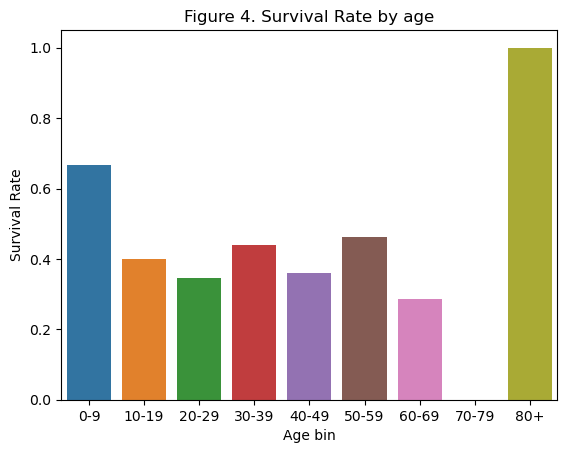

In [9]:
# Create bins and labels
age_bins = [0, 9, 19, 29, 39, 49, 59, 69, 79, float('inf')]  # Define your desired age bins
age_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']  # Labels for the bins

# Create new column ageBin
df['ageBin'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)
#display(df['ageBin'])

# Groupby survival rate by age bin
survival_rate_by_age_bin = df.groupby('ageBin')['Survived'].mean().reset_index()

# Visualization
sns.barplot(x='ageBin', y='Survived', data=survival_rate_by_age_bin)
plt.title('Figure 4. Survival Rate by age')
plt.xlabel('Age bin')
plt.ylabel('Survival Rate')
plt.show()

# Delete ageBin.
df.drop('ageBin',axis=1,inplace=True)

We can see that childrens under 10 have better survival rate than rest of the age groups. All passengers between 70 - 79 years didn't survive. The only one 80 year old passenger survived.

In [10]:
df[df['Age'] >= 80]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0,A23,S


#### 2.4.3 Passenger class

What is the distribution of passenger classes and how does the class affects on the survival rate?

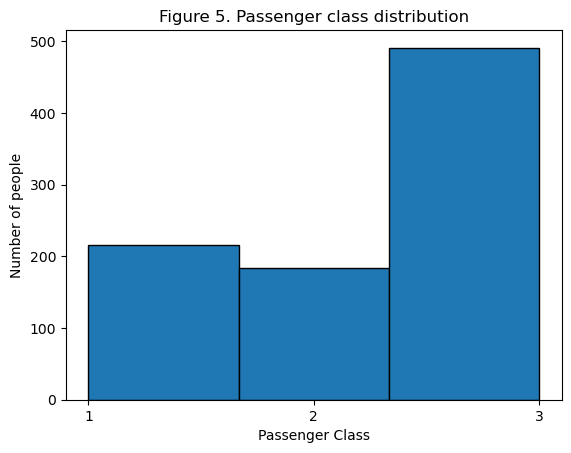

In [11]:
plt.hist(df['Pclass'], bins=3, edgecolor='k')

plt.xlabel('Passenger Class')
plt.ylabel('Number of people')
plt.title('Figure 5. Passenger class distribution')

plt.xticks([1,2,3]) # Set x-ticks by passenger classes.

plt.show()

Majority of passengers travel in third class.

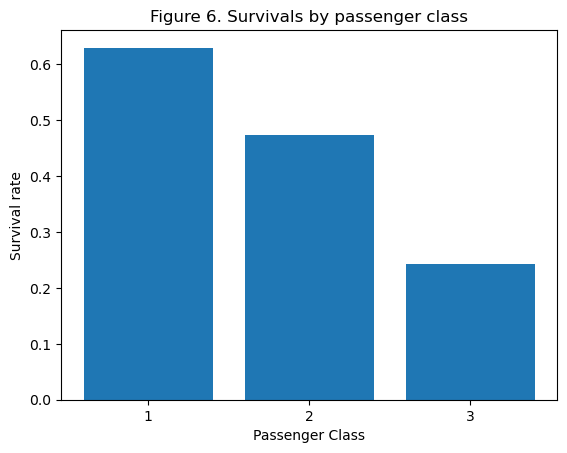

In [12]:
# Count survival rate by passenger class.
#display(df.groupby('Survived')['Pclass'].describe())

rate_class = df.groupby('Pclass')['Survived'].mean()

plt.bar(rate_class.index, rate_class)
plt.ylabel('Survival rate')
plt.xlabel('Passenger Class')
plt.title('Figure 6. Survivals by passenger class')
plt.xticks([1,2,3]) # Set x-ticks by passenger classes.

plt.show()

First class passengers have the best chance of survival and third class passengers have the worst chance of seeing the day after the accident.

#### 2.4.4 Gender of passengers

What is the distribution of passengers gender and how does the class effect on the survival rate?

In [13]:
# Count survival rate by passenger class.
#display(df.groupby('Sex')['Survived'].describe())
rate_gender = df.groupby('Sex')['Survived'].mean()
count_gender = df.groupby('Sex')['Survived'].count()

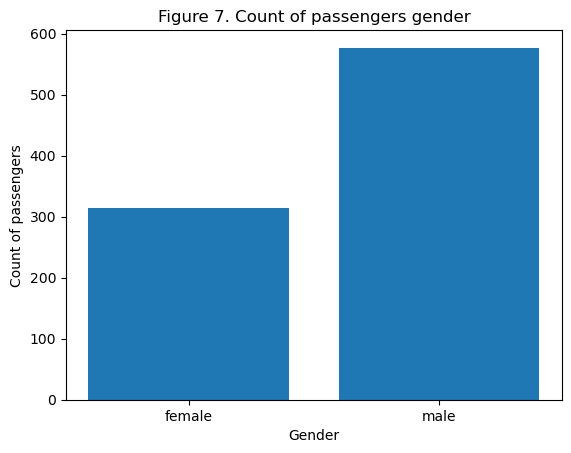

In [14]:
plt.bar(count_gender.index, count_gender)
plt.ylabel('Count of passengers')
plt.xlabel('Gender')
plt.title('Figure 7. Count of passengers gender')

plt.show()

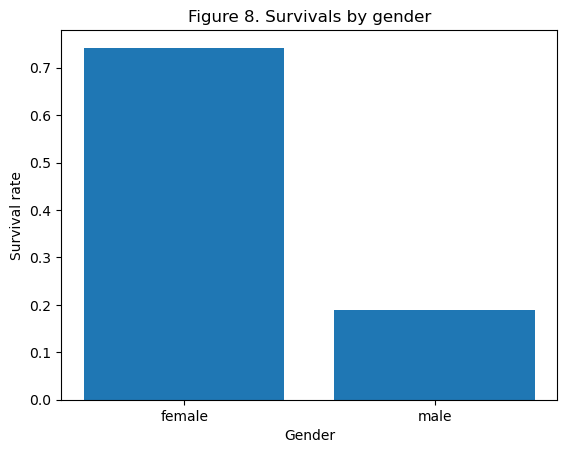

In [15]:
plt.bar(rate_gender.index, rate_gender)
plt.ylabel('Survival rate')
plt.xlabel('Gender')
plt.title('Figure 8. Survivals by gender')

plt.show()

Womans have alot better changes to survive than mens.

#### 2.4.5 The survival rate by passenger class and gender.

Let's unite passenger and gender information.

In [16]:
# Count survival rate by passenger class and gender.
#display(df.groupby(['Pclass','Sex'])['Survived'].describe())
# as_index is set to False. By default groupby creates multi-index which make problems when plotting a barplot.
rate_class_gender = df.groupby(['Pclass','Sex'], as_index=False)['Survived'].mean()

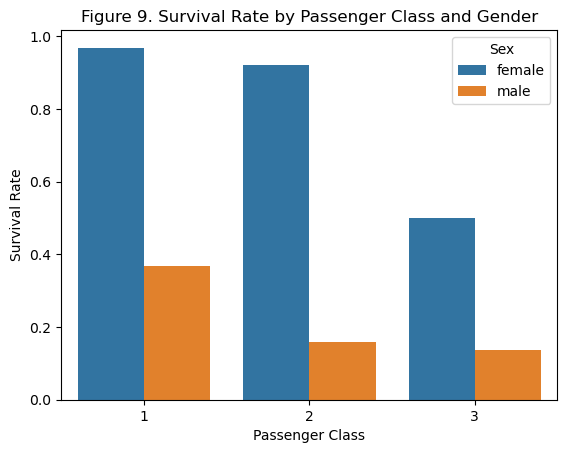

In [17]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=rate_class_gender)
plt.title('Figure 9. Survival Rate by Passenger Class and Gender')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

When we unite passenger class and gender information we see how good possibilities to survive is first class womens have versus second and third class mens.

#### 2.4.6 Ticket fare

What significance does the price of the ticket have on the chances of survival?

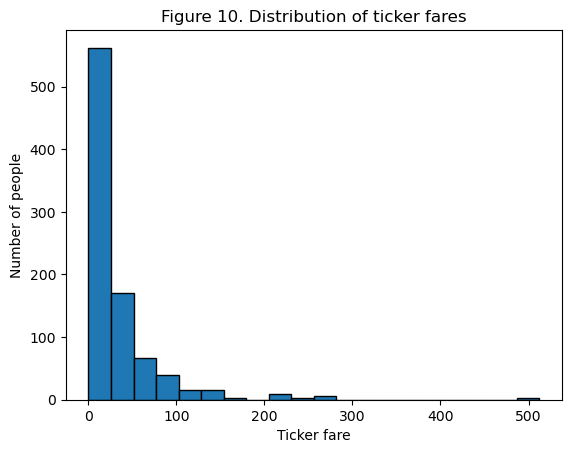

In [18]:
plt.hist(df['Fare'], bins=20, edgecolor='k')
plt.xlabel('Ticker fare')
plt.ylabel('Number of people')
plt.title('Figure 10. Distribution of ticker fares')

plt.show()

Most of the ticket fares are under 50£. Let's try to figure how get visualized ticket fares vs. survival rate.

We need to group fares to bins.

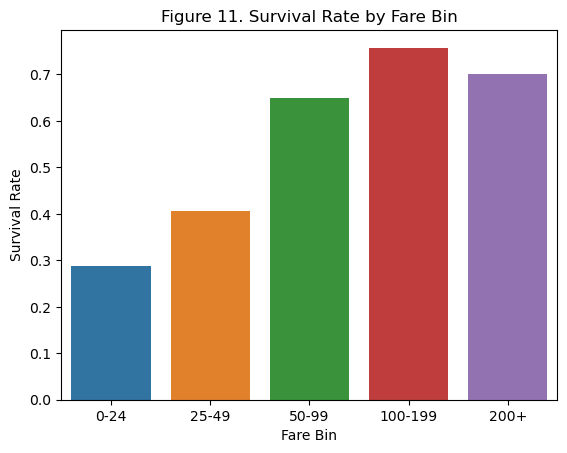

In [19]:
# create fare bins for plot
fare_bins = [0, 24, 49, 99, 199, float('inf')]  # Define fare bins
fare_labels = ['0-24', '25-49', '50-99', '100-199', '200+']  # Labels for bins

# create new column FareBin
df['FareBin'] = pd.cut(df['Fare'], bins=fare_bins, labels=fare_labels, right=False)

# Calculate the survival rate by fare bin
survival_rate_by_fare_bin = df.groupby('FareBin')['Survived'].mean().reset_index()

# Plot a bar plot
sns.barplot(x='FareBin', y='Survived', data=survival_rate_by_fare_bin)
plt.title('Figure 11. Survival Rate by Fare Bin')
plt.xlabel('Fare Bin')
plt.ylabel('Survival Rate')
plt.show()

Also we can see that low prizes mean also low survival rate.

This arises question. 

*Should I check how well ticket fare and passenger class correlates together?*

And *should I use ticket fare instead of passenger if I have to deside what information I will use in my model?*

Perhaps I will use both feature in my model but I think that it is aleast interesting information at this point.

Let's see correlation between Pclass and Fare.

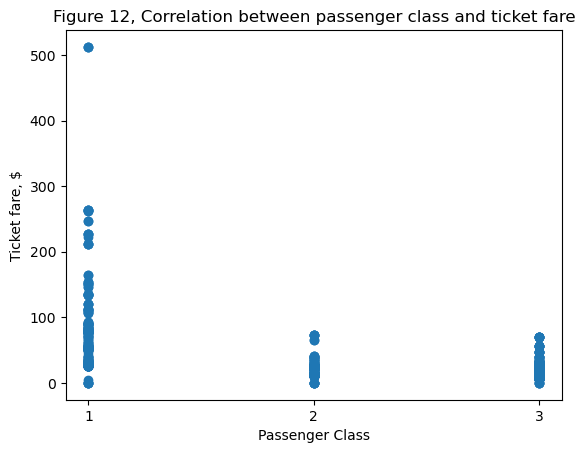

In [20]:
plt.scatter(df['Pclass'],df['Fare'])
plt.title('Figure 12, Correlation between passenger class and ticket fare')
plt.xlabel('Passenger Class')
plt.ylabel('Ticket fare, $')
plt.xticks([1,2,3])

plt.show()

As we can see in figure 12, first class tickets was also sold with small fares, but with small fare you coudn't buy first class ticket. Maybe there was also socio-economic backround wich affected to ticket fare. It would be interesting to find out but I try not to go too deep in my data understanding.

Next I will show in **figure 13 how number of siblings or spouse** AND after that in **figure 14 how parent or childrens** affected to survival rate.

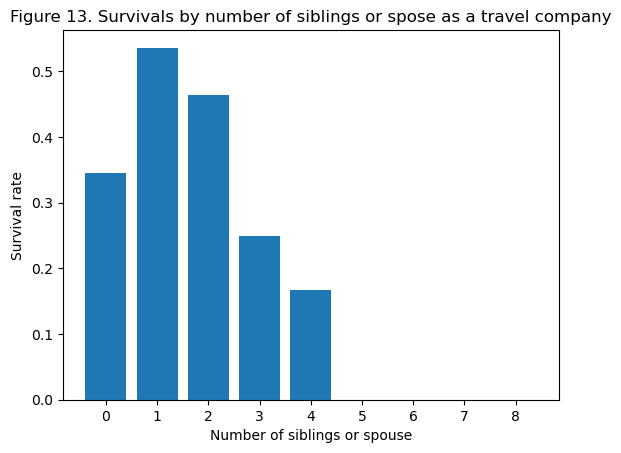

In [21]:
#display(df.groupby('SibSp')['Survived'].describe())
rate_sib = df.groupby('SibSp')['Survived'].mean()

plt.bar(rate_sib.index, rate_sib)
plt.ylabel('Survival rate')
plt.xlabel('Number of siblings or spouse')
plt.title('Figure 13. Survivals by number of siblings or spose as a travel company')

plt.xticks([0,1,2,3,4,5,6,7,8]) # Set x-ticks by number of SibPs

plt.show()

It migth be a little sad but if the passenger had more than four siblings it looks like they didn't survive.

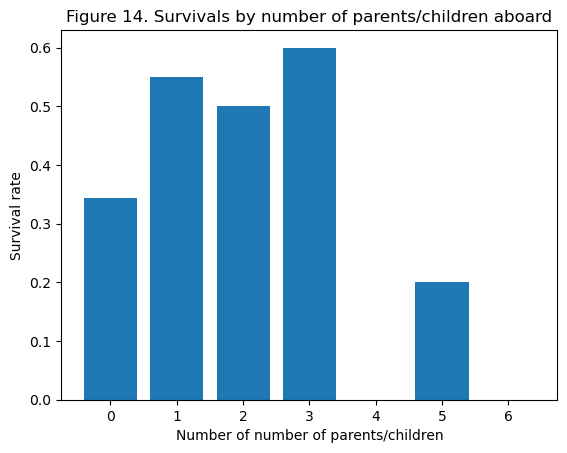

In [22]:
rate_par = df.groupby('Parch')['Survived'].mean()

plt.bar(rate_par.index, rate_par)
plt.ylabel('Survival rate')
plt.xlabel('Number of number of parents/children')
plt.title('Figure 14. Survivals by number of parents/children aboard')

#plt.xticks([0,1,2,3,4,5,6,7,8]) # Set x-ticks by passenger classes.

plt.show()

#### 2.4.6 Conclusions

At this point we can see that the passenger's class, ticket fare and gender explain relatively well the chances of survival.

Passengers age is meaningful for a childrens under 10 years and for a some reason passengers between 70-79 all died. Number of family members also affects to survival rate.

### 2.5 Outlier Detection
One important step for the Quality of the data is to implement **Outlier Detection** from the data.

I will visualize outliers in few columns.

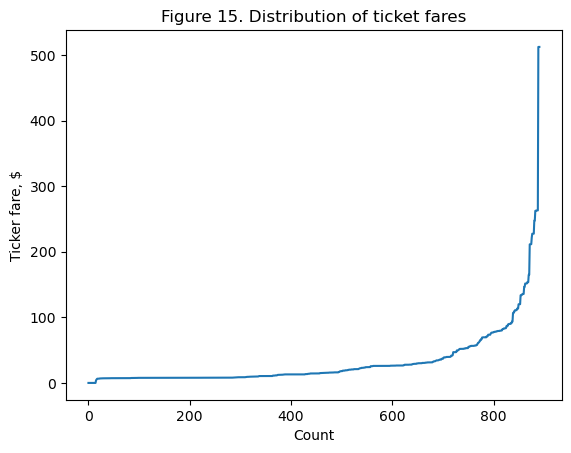

In [23]:
# Sort passengers by fare
temp = df.sort_values('Fare')
# Reset index and...
temp.reset_index(drop=True, inplace=True)
# ...plot.
plt.plot(temp.index, temp['Fare'])
plt.title('Figure 15. Distribution of ticket fares')
plt.ylabel('Ticker fare, $')
plt.xlabel('Count')
plt.show()

Figure 15 is trying to show that there is not many tickets with price of 300£ or more. Most of the ticket prices are below 100£. I think boxplots will give a better view for outliers.

Boxplot will show IQR as a box and leftside is Q1 and right side is Q3.

Text(0.5, 1.0, 'Figure 16. Distribution of ticket fares')

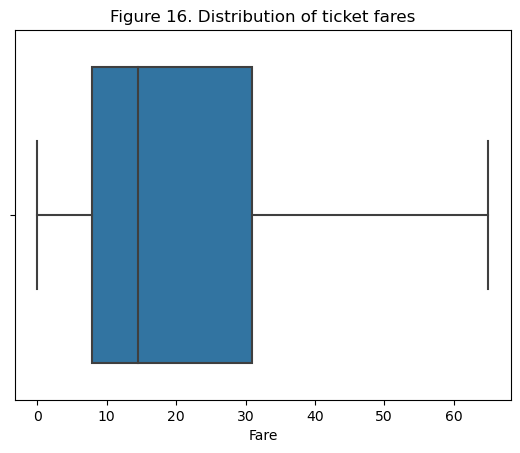

In [24]:
sns.boxplot(x=df.Fare, showfliers=False)
plt.title('Figure 16. Distribution of ticket fares')

How about age?

Text(0.5, 1.0, 'Figure 17. Distribution of passengers age')

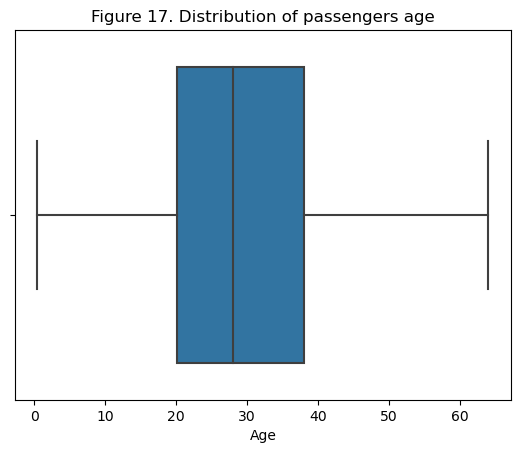

In [25]:
sns.boxplot(x=df.Age, showfliers=False)
plt.title('Figure 17. Distribution of passengers age')

I can see ourliers in two columns Fare and Age. I'm not sure how should I treat these. On the other hand ficket fares and passengers ages affects to survival rate. I will keep outliers with my data and maybe later I will delete outliers and see how it affects to models predictions.

#### Remove outliers from fare column
Next code is for deleting ouliers. If you want to delete, uncomment code.

In [26]:
# Next function and code which remove outliers is made by Shubham Kore. 
# Check this video.https: //www.youtube.com/watch?v=JI4C_ods_-Q

#def remove_outliers_IQR(df, fare, threshold=1.5):
#    # calculate q1 and q3 quartiles.
#    q1 = df['Fare'].quantile(0.25)
#    q3 = df['Fare'].quantile(0.75)
    # calculate iqr 
#    iqr = q3 -q1
    # calculte lower and upper bound...
#    lower_bound = q1 - threshold * iqr
#    upper_bound = q3 - threshold * iqr
    # ... and use it as a condition in a filter.
#    return df[(df['Fare'] >= lower_bound) & (df['Fare'] <= upper_bound)]

In [27]:
#columns_to_check = ['Fare']

# every value in column is passed to remove_outliers function
#for col in columns_to_check:
#    df1 = remove_outliers_IQR(df, col)
# here df1 is new dataframe with no missing values and without outlier in fare column

In [28]:
# Comparison between with and without outlier in fare coumn for better understanding
#plt.figure(figsize=(10,6))
#plt.boxplot([df['Fare'],df1['Fare']], labels = ['With outliers', 'Without outliers'])
#plt.title('Comparison of Fare with and without outliers')
#plt.show()

#### Remove outlier from Age column

In [29]:
# check the outliers for Age column.
#def remove_outliers_IQR(df, fare, threshold=1.5):
#    q1 = df['Age'].quantile(0.25)
#    q3 = df['Age'].quantile(0.75)
#    iqr = q3 -q1
#    lower_bound = q1 - threshold * iqr
#    upper_bound = q3 - threshold * iqr
#    return df[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)]

In [30]:
#columns_to_check = ['Age']

#for col in columns_to_check:
#    df1 = remove_outliers_IQR(df, col)
# here df1 is new dataframe with no missing values and without outlier in Age column

In [31]:
# Comparison between with and without outlier in Age coumn for better understanding
#plt.figure(figsize=(10,6))
#plt.boxplot([df['Age'],df1['Age']], labels = ['With outliers', 'Without outliers'])
#plt.title('Comparison of Age with and without outliers')
#plt.show()

## Phase 3: Data preprocessing

Data preprocessing is an important step to ensure that dataset is ready for machine learning phase.
Things what I will do in this preprocessing phase with the Titanic dataset.

1. Handling Missing Values.
2. Feature engineering. I create new features or transform existing ones.
3. Visualization: I will visualize new features. And also recalculate statistics after data is preprocessed.
4. Categorical Variable Encoding. It essential to encode categorical variables for a Machine Learning model. Selected method for encoding is one-hot encoding.
5. Feature Scaling. Scaling features, such as age or fare. I will use min-max scaling method for scaling.

### 3.1 Handling Missing Values
NaN values are big problems for ML models. We know that there is missing values in three column Age, Cabind and Embarked.
Let's find the way to handle NaN values in this dataset.

**Age** is hard to determine. We could give best guess when we examine every row individually and examine what kind of travel company they have. And maybe we could code a function for that. Unfortunately this is too much work for us now. Easiest way is to replace the NaN values with the average age.

**Cabin** and **Embarked** is easier to handle. We can replace all NaN values to string 'Unknown'. It will describe the situation best way.

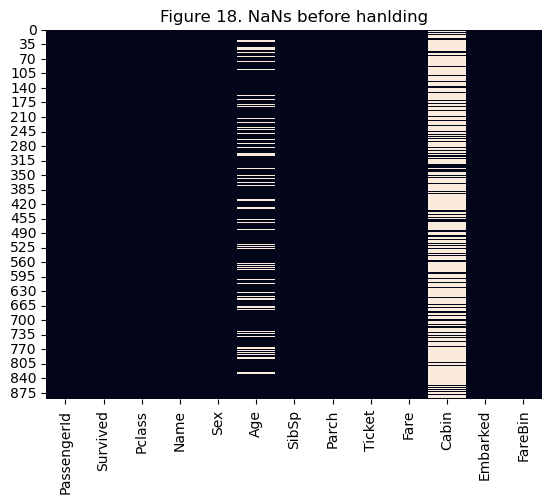

Average of passengers age is 30.


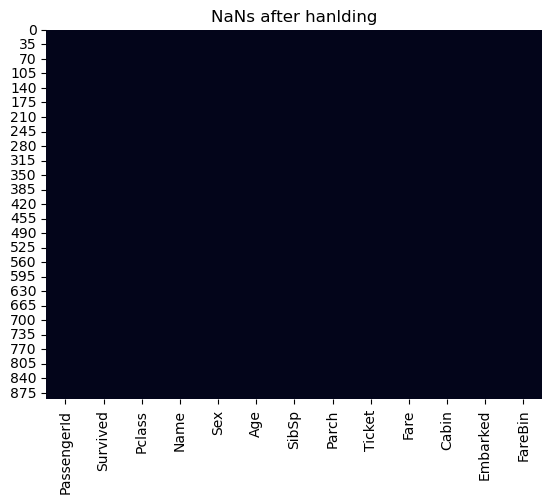

In [32]:
# Inspiration to visualize nans is made by Shubham Kore. 
# Check this video.https: //www.youtube.com/watch?v=JI4C_ods_-Q

sns.heatmap(df.isna(), cbar=False)
plt.title('Figure 18. NaNs before hanlding')
plt.show()

print(f'Average of passengers age is {round(df["Age"].mean())}.')
# Replace nan values in Age column by Age.mean()
df['Age'].fillna(round(df['Age'].mean()), inplace=True)

# Replace nan values in Cabin and Embarked columns by string 'Unknown'.
df[['Embarked','Cabin']] = df[['Embarked','Cabin']].fillna('Unknown')

sns.heatmap(df.isna(), cbar=False)
plt.title('NaNs after hanlding')
plt.show()

Nans are handled correctly. Next we will try to think is there a possibility to create new features from excisting data.

### 3.2 Feature engineering

I create new features.

|Column|Explanation|Values|
|-----|------|-----|
|HasCabin|We want to know if cabin affects the survival rate|Cabin is 'Unknown' = 0, Else = 1|
|ticketNumber|Ticket number values varies|extract numerical values|
|FamilySize|How did families survives vs. couples and solo travelers |SibSp + Parch + 1|
|Deck|Cabins first letter will tell deck number |U=0, A=1, B=2, C=3, etc.|
|Title|Name columns middle string tell passengers title |Miss, Mrs, Mr, etc.|

In [33]:
# Numpy where function return 0 or 1 depending on condition.
df['HasCabin'] = np.where((df['Cabin'] == 'Unknown'), 0,1)

# https://stackoverflow.com/questions/38498718/split-pandas-column-and-add-last-element-to-a-new-column
# split ticket to list and add last string to a new column
df['TicketNumber'] = df['Ticket'].str.split(' ').str[-1]
    
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

df['Deck'] = df['Cabin'].str[0]

df['Title'] = df['Name'].str.split(' ').str[1]#.str.split('.').str[0]

In [34]:
# Next code is done by Aman Krishna 2022.
# https://python.plainenglish.io/kaggle-titanic-challenge-create-them-features-a324ba577812

# Grouping Title
new_title = {
    'Mr' : 'Mr','Ms' : 'Ms','Mrs' : 'Mrs','Rev' : 'officer','Sir' : 'royalty','theCountess' : 'royalty','Dona' : 'royalty','Capt' : 'officer','Col' : 'officer','Don' : 'royalty','Dr' : 'officer','Jonkheer' : 'royalty','Lady' : 'royalty','Major' : 'officer','Master' : 'kid','Miss' : 'Ms','Mlle' : 'Ms','Mme' : 'Mrs'
}

# Function which add title to passenger
def add_title(df):
    df['Title'] = df['Name'].apply(lambda x: x.split(",")[1])
    df['Title'] = df['Title'].apply(lambda x: x.split(".")[0])
    df.Title = df.Title.str.replace(' ', '')
    
add_title(df)

# Group Title
df['Title'] = df['Title'].apply(lambda x: new_title[x])
#display(pd.DataFrame(df.groupby('Title')['PassengerId'].nunique()))


In [35]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareBin,HasCabin,TicketNumber,FamilySize,Deck,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,0-24,0,21171,2,U,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,50-99,1,17599,2,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,0-24,0,3101282,1,U,Ms
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,50-99,1,113803,2,C,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,0-24,0,373450,1,U,Mr


### 3.3 Visualize new features

Visualization for new features.


#### 3.3.1 Has cabin or not
Majority of passengers don't have cabin information. But on the other hand we can see that cabin information affects higly to survival rate.

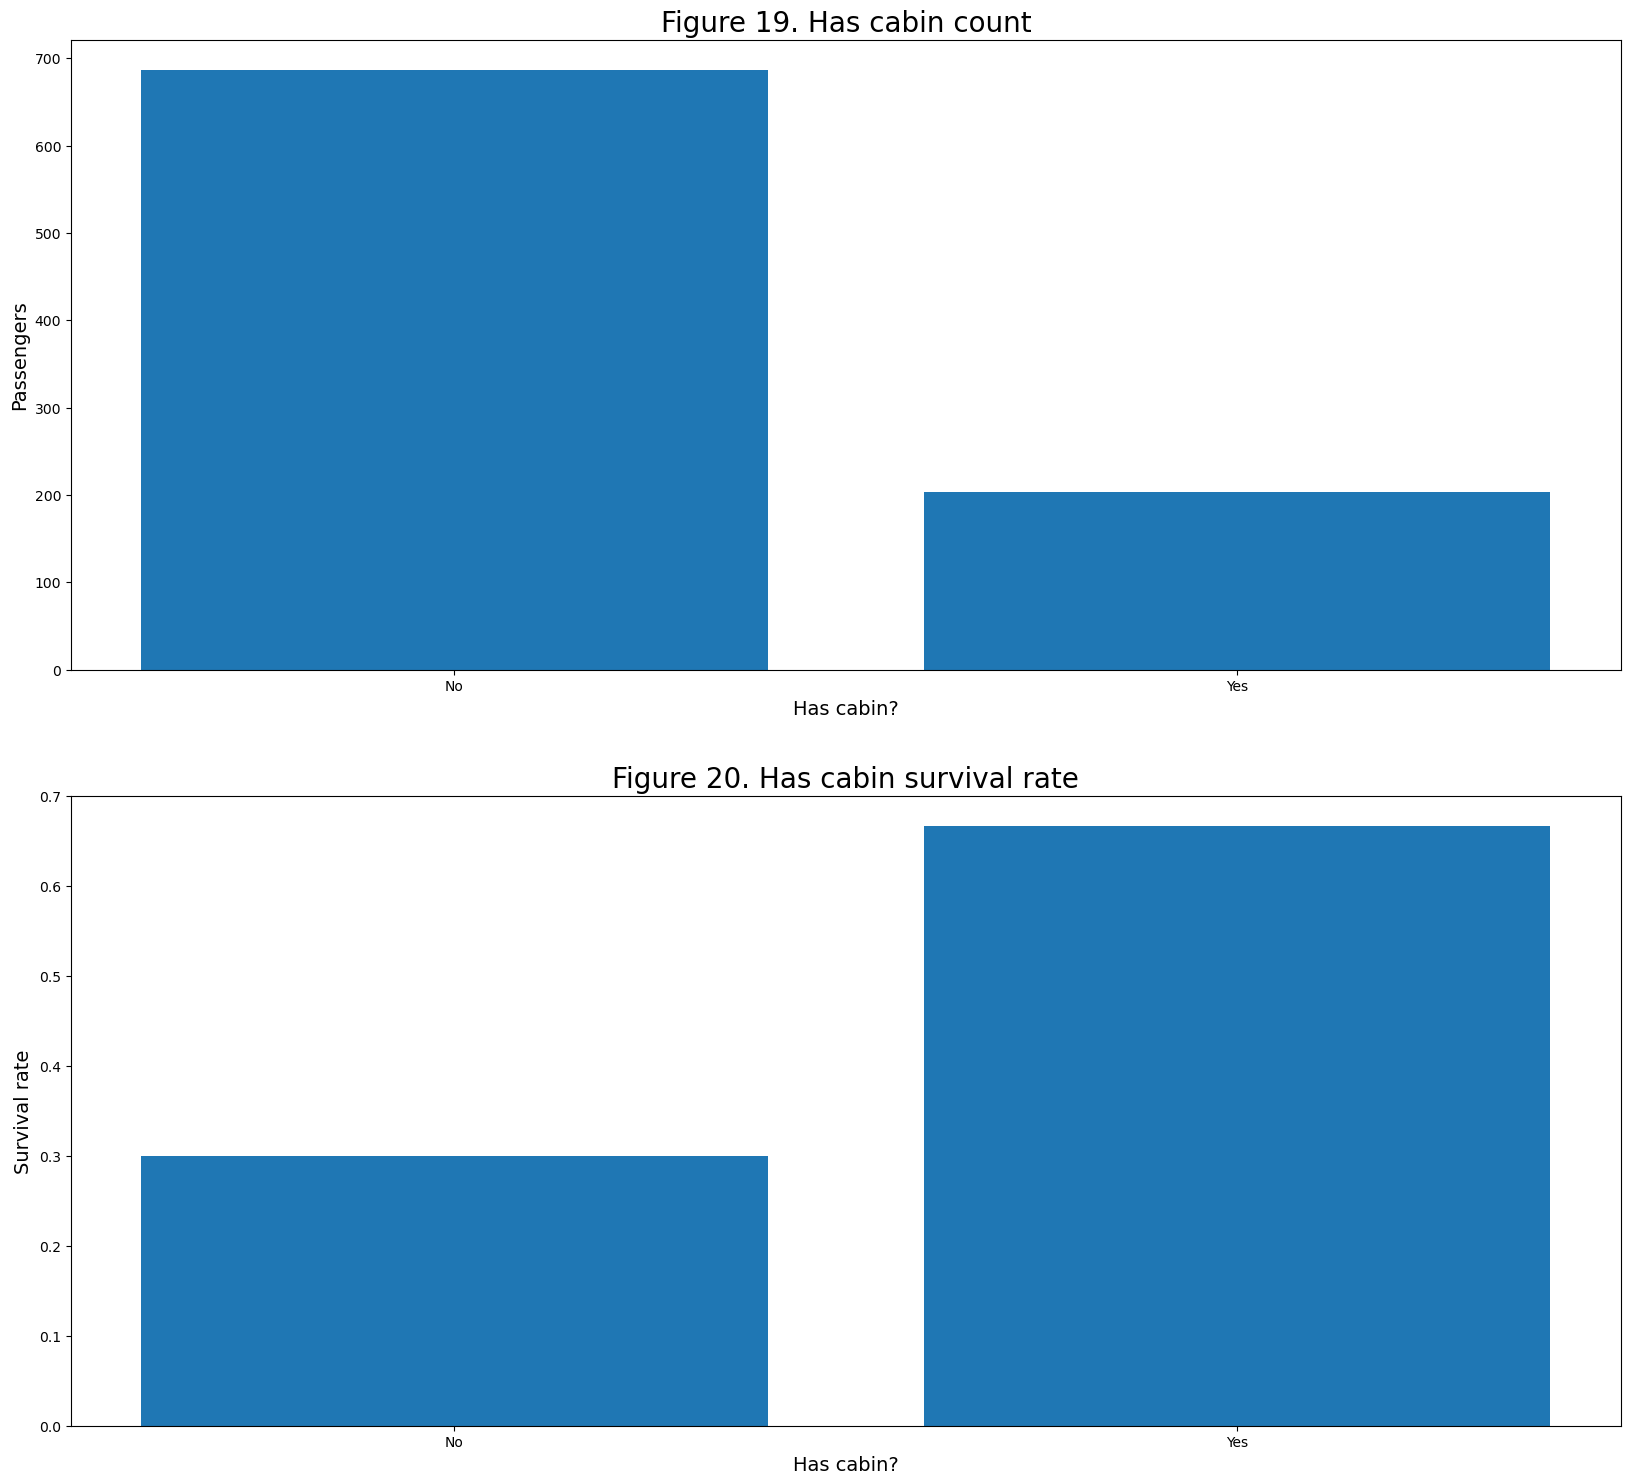

In [36]:
#display(df.groupby('HasCabin')['Survived'].describe())

rate = df.groupby('HasCabin')['Survived'].mean()
count= df.groupby('HasCabin')['Survived'].count()
# Set 0 = No and 1 = Yes
rate.index = ['No','Yes']
count.index = ['No','Yes']

fig, (ax1,ax2) = plt.subplots(2,1,figsize=(20, 18))
ax1.bar(count.index, count)
ax1.set_ylabel('Passengers', size=14)
ax1.set_xlabel('Has cabin?', size=14)
ax1.set_title('Figure 19. Has cabin count', size=20)

ax2.bar(rate.index, rate)
ax2.set_ylabel('Survival rate', size=14)
ax2.set_xlabel('Has cabin?', size=14)
ax2.set_title('Figure 20. Has cabin survival rate', size=20)

plt.show()

#### 3.3.2 Which deck is the best place to survive?
Count how many passenger is in different deck and count the survivalrate of different decks.

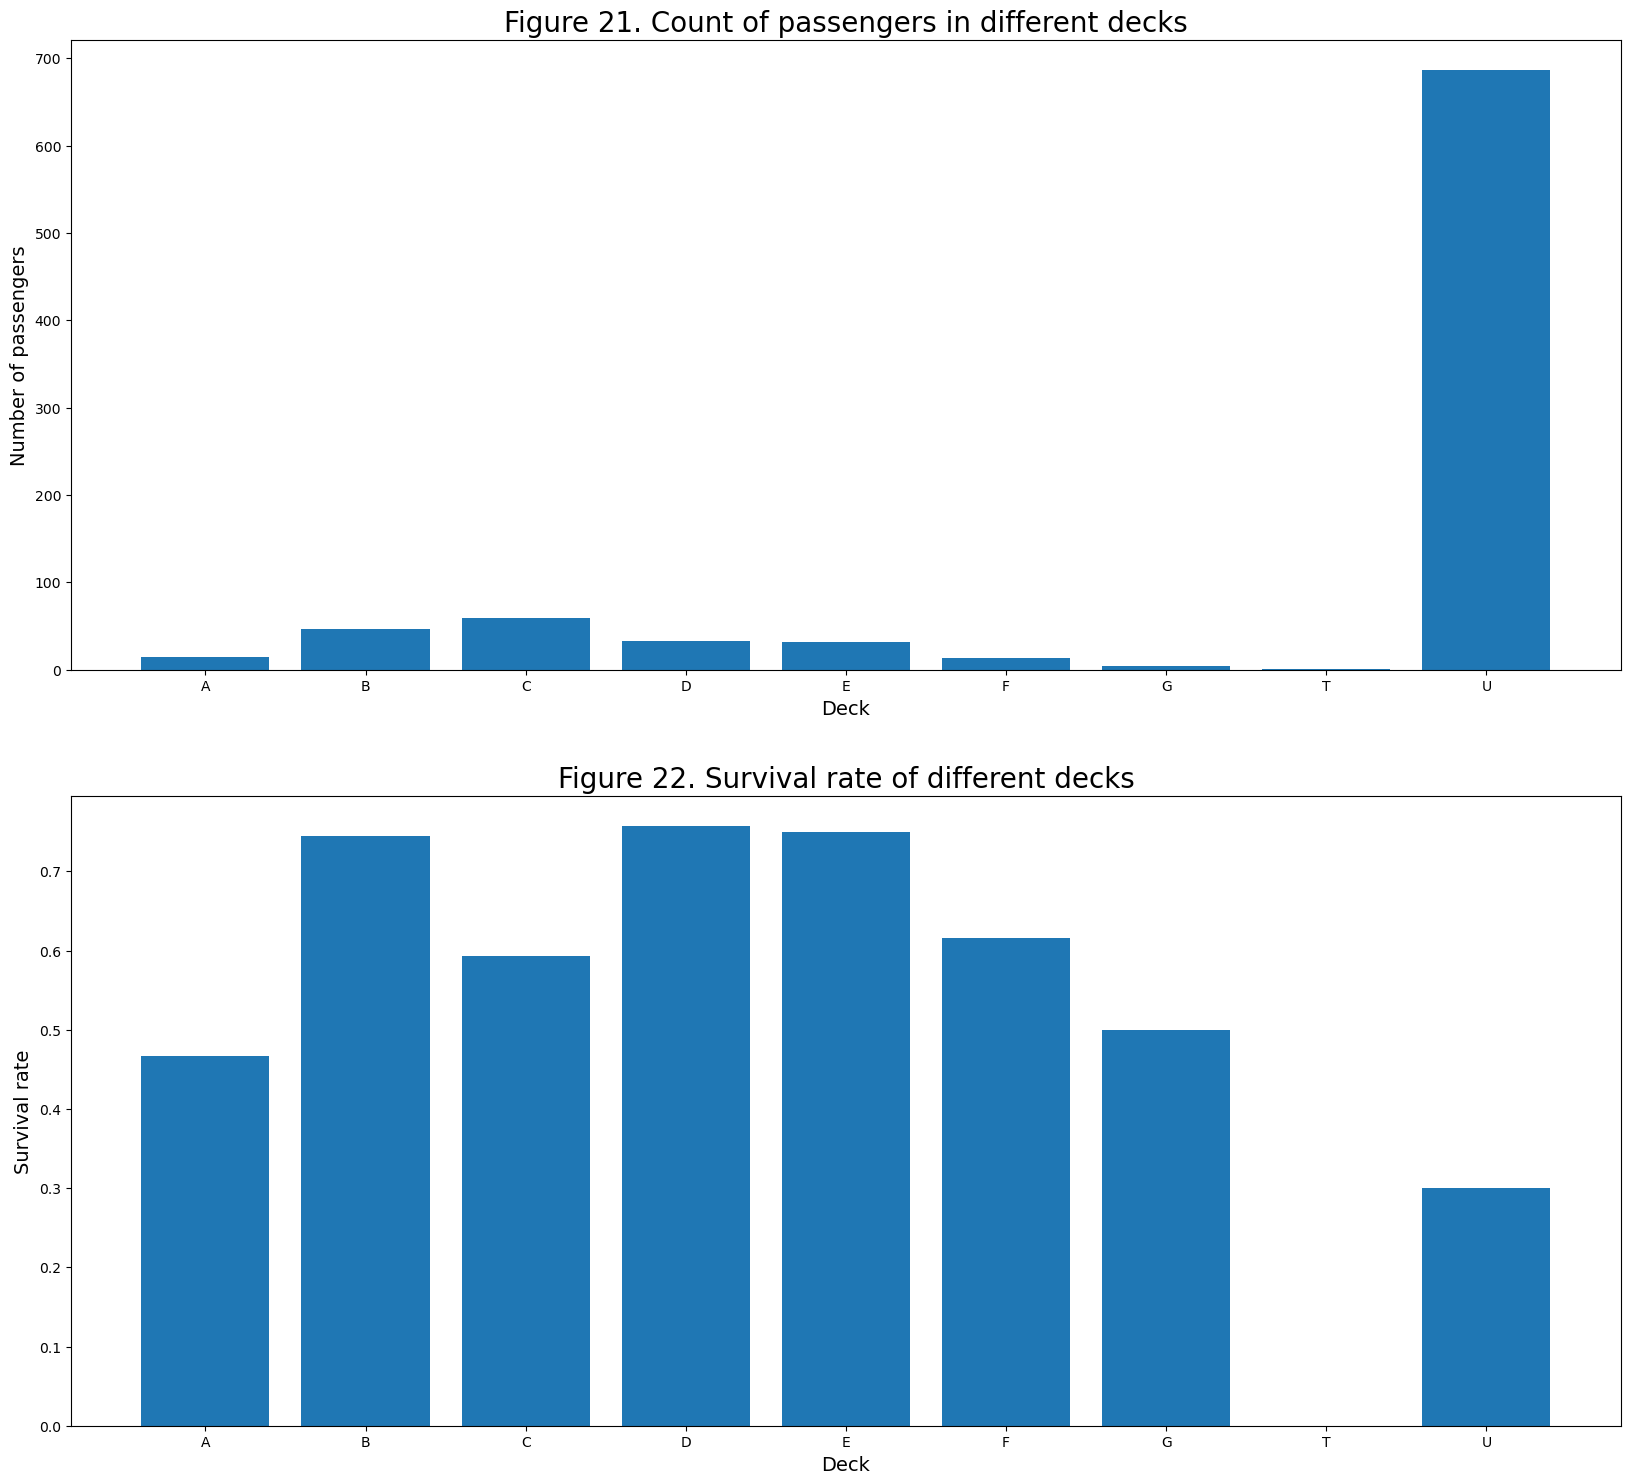

In [37]:
rate = df.groupby('Deck')['Survived'].mean()
count= df.groupby('Deck')['Survived'].count()

fig, (ax1,ax2) = plt.subplots(2,1,figsize=(20, 18))
ax1.bar(count.index, count)
ax1.set_ylabel('Number of passengers', size=14)
ax1.set_xlabel('Deck', size=14)
ax1.set_title('Figure 21. Count of passengers in different decks', size=20)

ax2.bar(rate.index, rate)
ax2.set_ylabel('Survival rate', size=14)
ax2.set_xlabel('Deck', size=14)
ax2.set_title('Figure 22. Survival rate of different decks', size=20)

plt.show()

Letter U stands for unknown deck. 

Reason for most passengers is with unknown deck is ecause deck information is extracted from cabin number which was not provided for majority of passengers.

Remarkable thing in these pictures is that people who have no deck knowledge also have ower survival rate.

#### 3.3.3 Does family size matter?

Majority of passengers were solo travelers. Then there was couples or passenger with one or two family member as a travel companion.

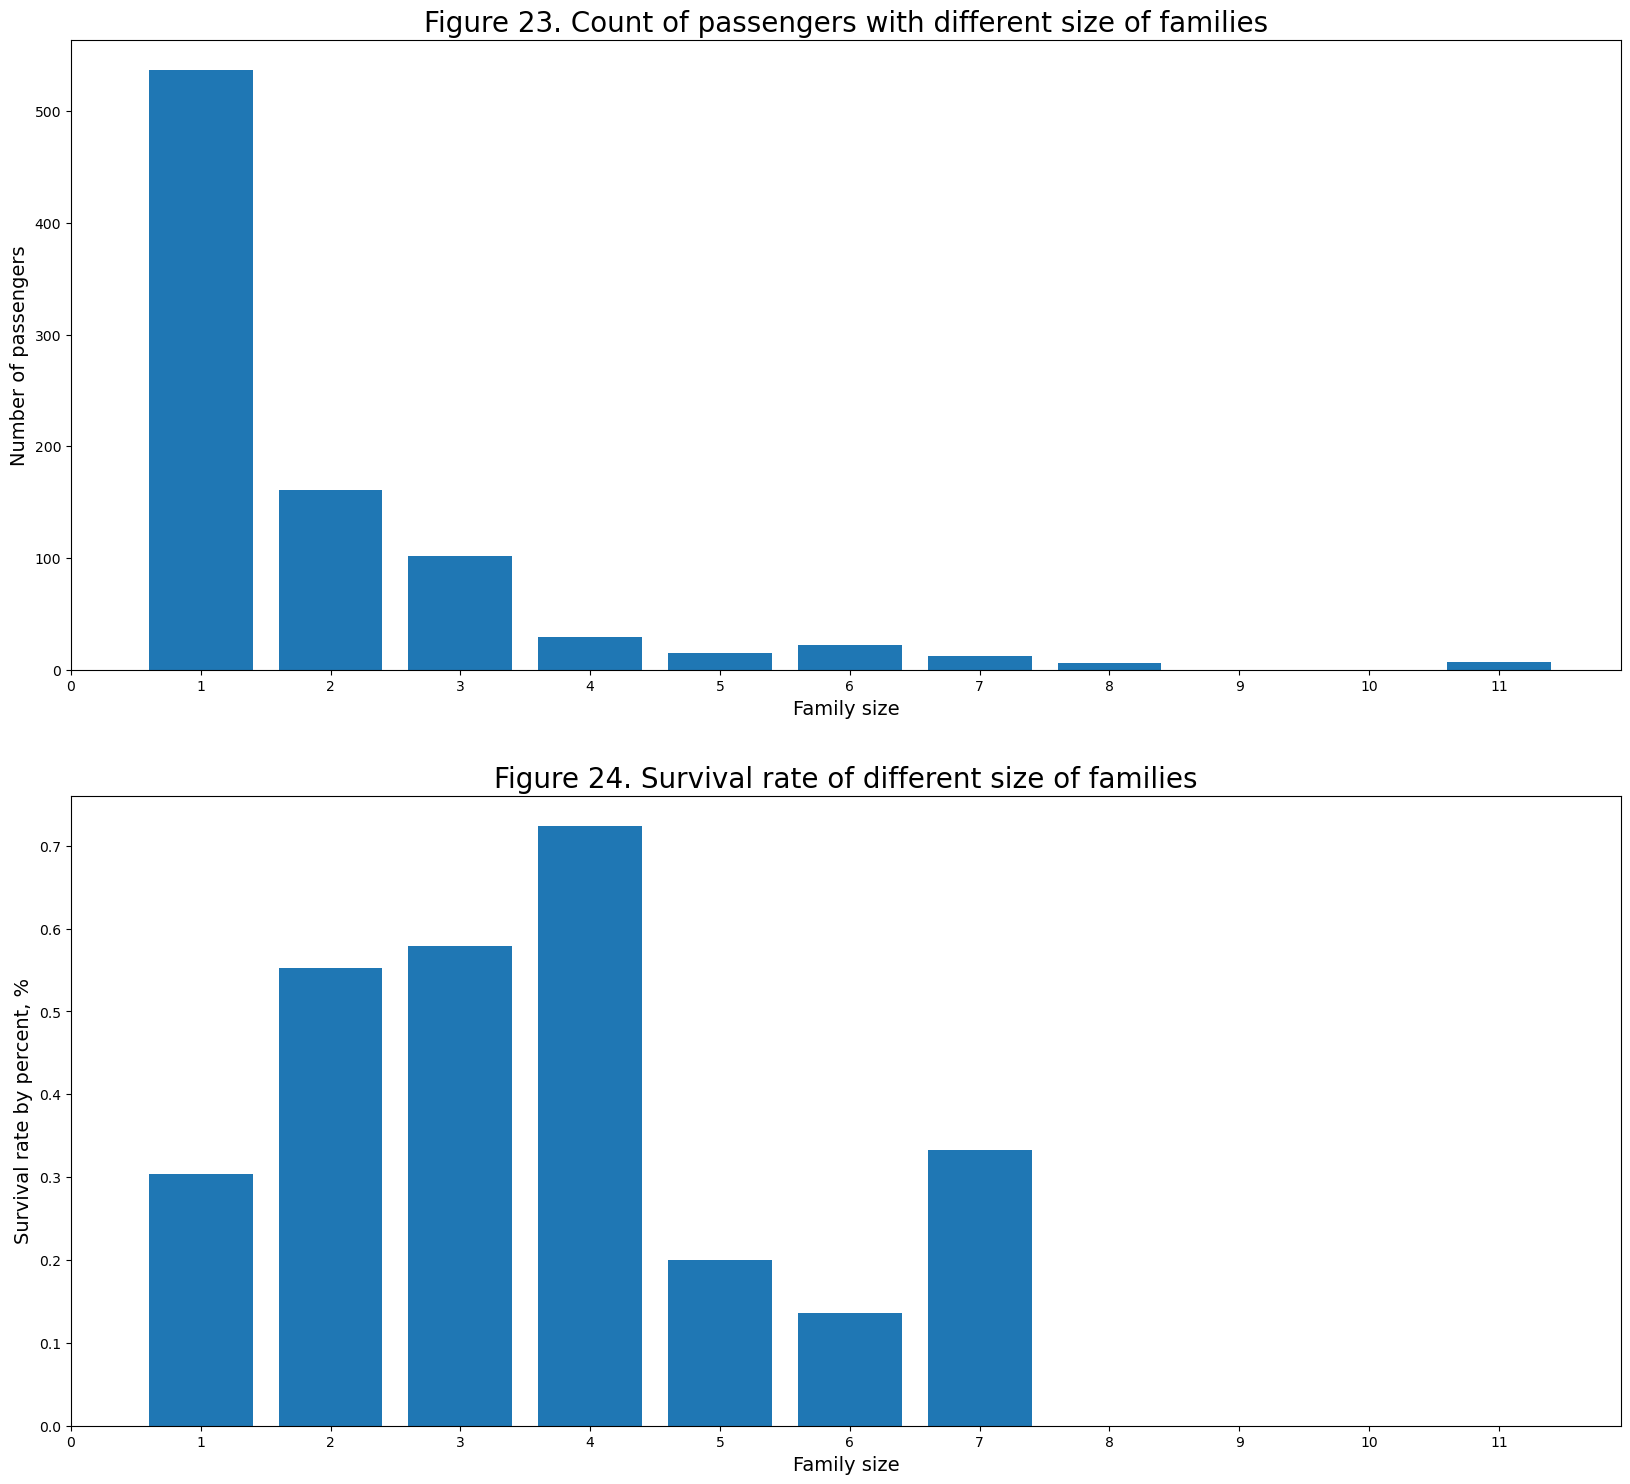

In [38]:
rate = df.groupby('FamilySize')['Survived'].mean()
count= df.groupby('FamilySize')['Survived'].count()

fig, (ax1,ax2) = plt.subplots(2,1,figsize=(20, 18))
ax1.bar(count.index, count)
ax1.set_ylabel('Number of passengers', size=14)
ax1.set_xlabel('Family size', size=14)
ax1.set_title('Figure 23. Count of passengers with different size of families', size=20)
ax1.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11])


ax2.bar(rate.index, rate)
ax2.set_ylabel('Survival rate by percent, %', size=14)
ax2.set_xlabel('Family size', size=14)
ax2.set_title('Figure 24. Survival rate of different size of families', size=20)
ax2.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11])

plt.show()

Families of two, three or four members had a better change to survive. After four familymember the survival rate drops considerably. 

#### 3.3.4 Title of passenger

In name was included title. Let's see what kind of titles is offered and how different titles survived.

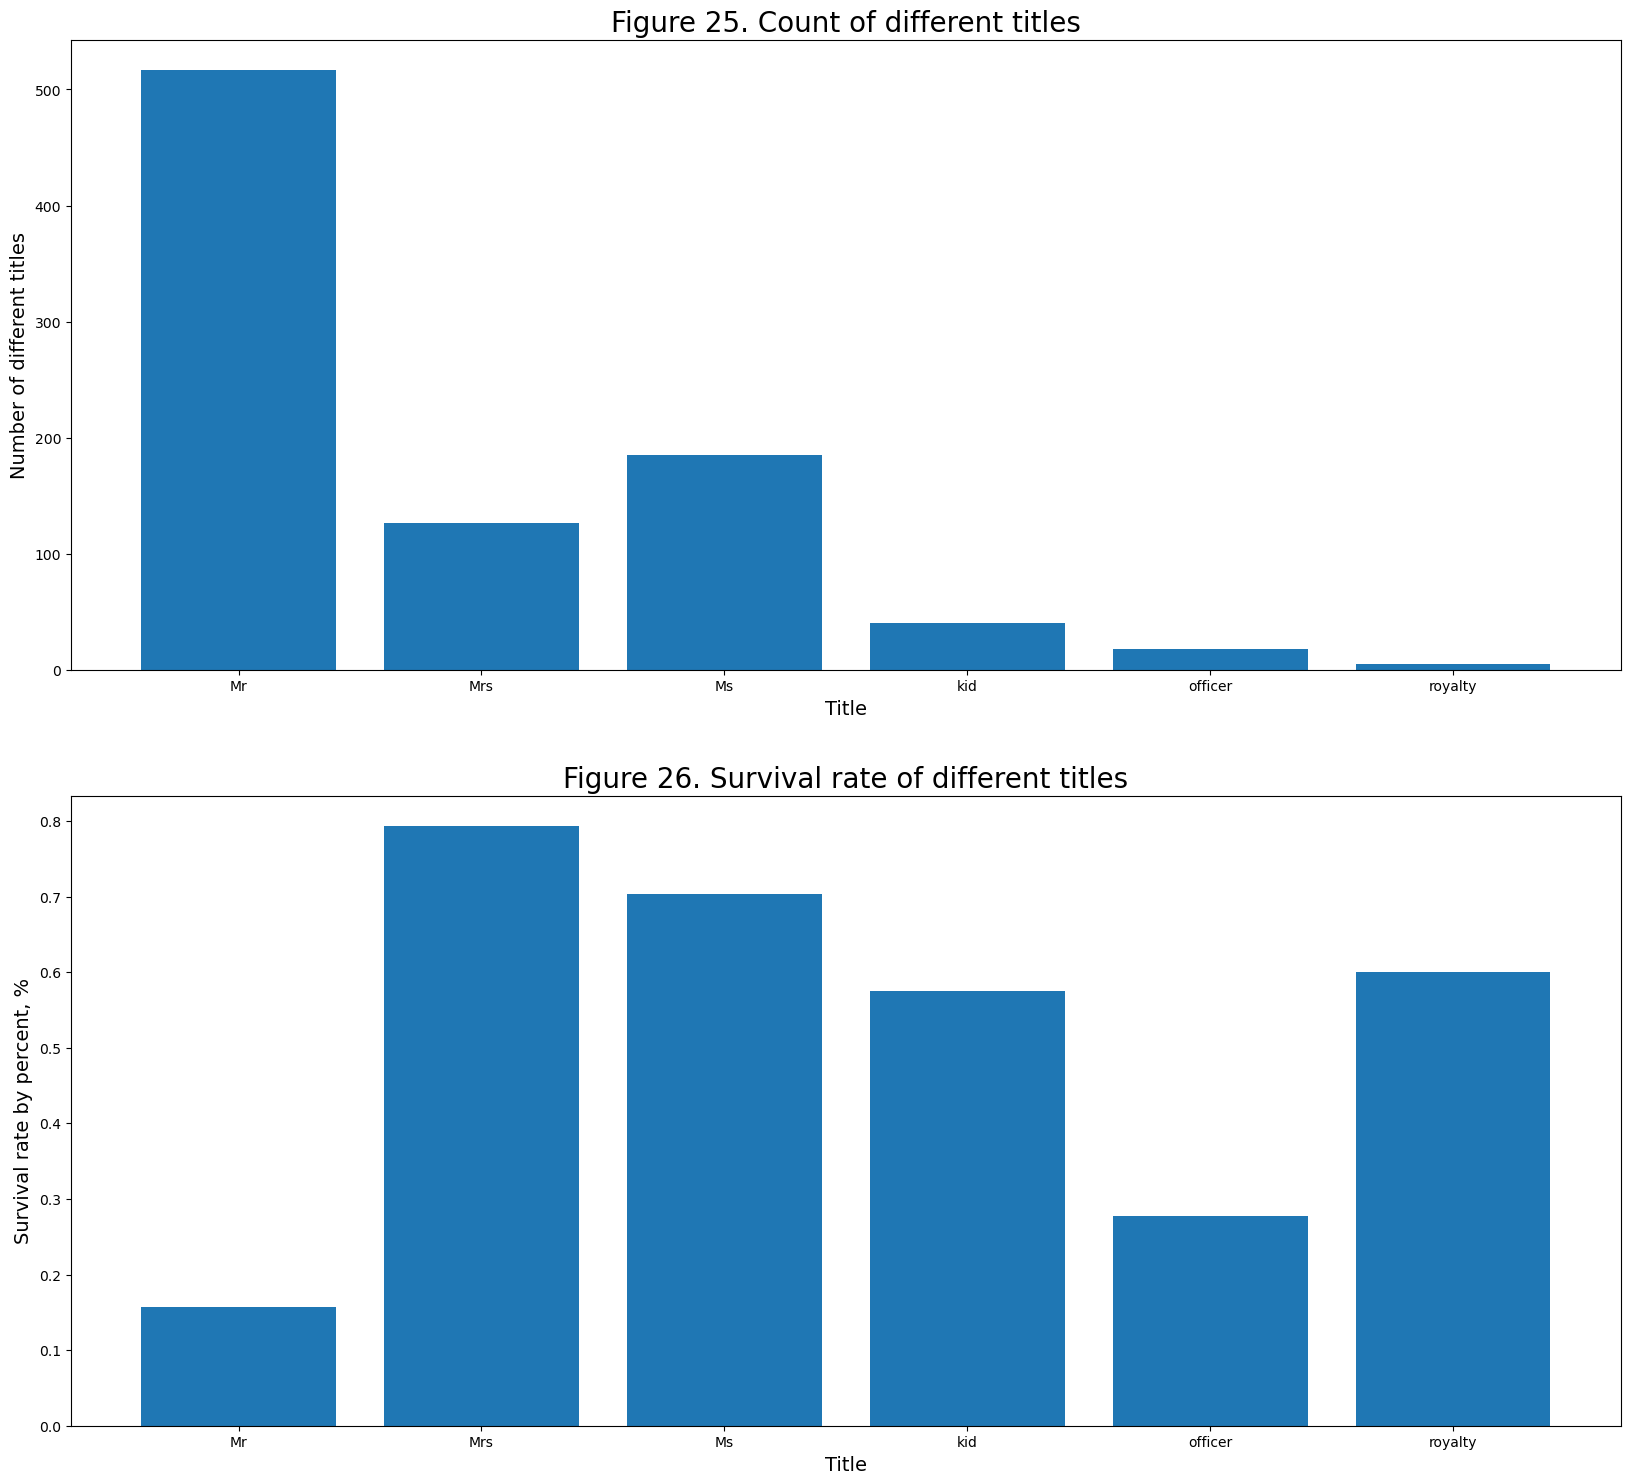

In [39]:
rate = df.groupby('Title')['Survived'].mean()
count= df.groupby('Title')['Survived'].count()

fig, (ax1,ax2) = plt.subplots(2,1,figsize=(20, 18))
ax1.bar(count.index, count)
ax1.set_ylabel('Number of different titles', size=14)
ax1.set_xlabel('Title', size=14)
ax1.set_title('Figure 25. Count of different titles', size=20)

ax2.bar(rate.index, rate)
ax2.set_ylabel('Survival rate by percent, %', size=14)
ax2.set_xlabel('Title', size=14)
ax2.set_title('Figure 26. Survival rate of different titles', size=20)

plt.show()

Titles that belong to women or children increase the survival rate. Also it seems like officers survived better than most males. Nor were the royals privileged, although they fared better on average passengers...

This is end of data visualization and preprocessing. Now I move to toward to the next phase which is data modeling with machine learning models. Final thing in data preprocessing phase is data encoding.

### 3.4 Categorical Variable Encoding

If I want to use categorical variables (other than numerical variables?) for Machine Learning I need to encode data to numerical data. There is few encoding methods. **I will use method called label encoding.** I should familiarise with one-hot encoder and ordinal encoding but this is not the right time for that...

Let's excamine what kind of datatypes I have in different columns?

In [40]:
df.dtypes

PassengerId        int64
Survived           int64
Pclass             int64
Name              object
Sex               object
Age              float64
SibSp              int64
Parch              int64
Ticket            object
Fare             float64
Cabin             object
Embarked          object
FareBin         category
HasCabin           int32
TicketNumber      object
FamilySize         int64
Deck              object
Title             object
dtype: object

In [41]:
# import preprocessing from sklearn
from sklearn import preprocessing

In [42]:
# Decode all columns which is used in ML-model from objects to numerical values.
df[['Sex','Deck','Title','Embarked']] = df[['Sex','Deck','Title','Embarked']].apply(preprocessing.LabelEncoder().fit_transform)
df.dtypes

PassengerId        int64
Survived           int64
Pclass             int64
Name              object
Sex                int32
Age              float64
SibSp              int64
Parch              int64
Ticket            object
Fare             float64
Cabin             object
Embarked           int32
FareBin         category
HasCabin           int32
TicketNumber      object
FamilySize         int64
Deck               int32
Title              int32
dtype: object

**Notice how the data types changed for the columns I will be using in modelling phase.**

## Phase 4: Modelling

Target is to do **Titanic Survival Prediction with Machine Learning**.
I will build and compare machine learning models for predicting passenger survival on the Titanic.

1. Data Splitting

* Split the dataset into training and testing sets (e.g., 80% training and 20% testing) to evaluate model performance.

2. Modeling

* I will implement three different classifiers: Decision Tree, k-Nearest Neighbors (kNN), and Random Forest.
* Train each model on the training data.

3. Model Evaluation

* Evaluate the performance of each model on the testing data using evaluation metrics such as accuracy, precision and F1-score.

4. Comparison

* Compare the results of the three classifiers to determine which one performs the best in terms of survival prediction.

5. Conclusion

* Summarize your findings and provide insights into which model is most suitable for predicting Titanic passenger survival based on the dataset.
* Include visualizations and explanations to explain your findings.

In [43]:
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

### 4.0 Processing for ML phase

Next I will select the features and target variable for an ML process. 
Selected features are all numerical columns. Target variable is the variable that im are trying to predict. It is the output variable that model will learn to predict based on the input features.
Input features are chosen by information which we gathered in data understanding and preprocessing stages.
I dropped columns name, ticket, cabin, farebin and ticketNumber.

- **Input Features**: PassengerId, Pclass, Sex, Age, SibSp, Parch, Fare, Embarked, HasCabin, FamilySize, Deck, Title
- **Target Value**: Survived

At this point I will take as many features as I feel like :) I know that there is two methods for doing this. Methods are **forward** and **backward** methods. When I include this many candidates I thing this is more like backward method.

Let's see what happens.

In [44]:
#df.isna().sum()

In [45]:
# Take all numerical columns to ML-modeling. Drop target variable.
X = df.select_dtypes(include=['float64','int64','int32']).drop(['Survived'],axis=1)
# Target variable is survived...
y = df['Survived']

#display(X.head())
#display(y.head())

### 4.1 Data Splitting

Always Split the data into training and test sets.

Split the data into training and test sets.

Use the following properties for splitting in this assignment:

* `y` is the target variable to predict.
* `Test_size=0.2` specifies that 20% of the data will be used for testing.
* `Random_state=42` is used to set a seed for the random number generator, and it ensures that the split will be reproducible.
* `Stratify=y` ensures that the class distribution in the target variable is preserved in both the training and testing sets.

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

At this point scale all features to 0 - 1.

In [47]:
# MinMaxScaler() is used to scale data to the range 0 - 1.
mm_scaler = MinMaxScaler()
X_train = mm_scaler.fit(X_train).transform(X_train)
X_test = mm_scaler.transform(X_test)

In [48]:
#print(mm_scaler)
#print(X_train)
print(X_train.shape)
#print(X_test)
print(X_test.shape)

(712, 12)
(179, 12)


Now data is splitted to train and test data. Next we implement three different ML- models.

### 4.2 Modeling
Implement
* Decision Tree,
* k-Nearest Neighbors (kNN), and
* Random Forest ML models

to make predictions with data.

Create all three models. Then train the models and make predictions.

#### Create decision Tree

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Create model object
m_DT = DecisionTreeClassifier(random_state=42)

# Generate (fit) decision tree
m_DT.fit(X_train,y_train)

# Predict results
y_pred_DT = m_DT.predict(X_test)

In [50]:
from sklearn.tree import export_graphviz
# export tree.dot file and check how it looks like: https://dreampuf.github.io/GraphvizOnline/
export_graphviz(decision_tree=m_DT, out_file="tree.dot",
                feature_names=X.columns, class_names=True, filled=True, rounded=True)

#### Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
# Create model
m_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Generate(fit) model
m_rf.fit(X_train, y_train)

# Predict results
y_pred_rf = m_rf.predict(X_test)

#### k-Nearest Neighbors

In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors

Implement kNN algorithm. Firstly find out what is optimal k-value (count for neighbors).

In [54]:
error_rate = []
for i in range(1,60): # test different k values 1-60
    knn = neighbors.KNeighborsClassifier(n_neighbors = i) 
    knn.fit(X_train, y_train) 
    y_pred_i = knn.predict(X_test)
    error_rate.append(np.mean(y_pred_i != y_test))  
    
    #print(np.mean(y_pred_i != y_test))

In [55]:
# If you want to see what kind of error rates different k-values give, uncomment next figure.
#plt.figure(figsize = (10,6))
#plt.plot(range(1,60), error_rate,color = 'blue', linestyle = 'dashed', marker='o', markerfacecolor='red', markersize=10)
#plt.title('Error Rate vs. k value')
#plt.xlabel('k')
#plt.ylabel('Error Rate')
#plt.show()

# save the k- number with best smallest error rate.
k = error_rate.index(min(error_rate))
print("Minimum error", min(error_rate), "is achieved with k value of", k)

Minimum error 0.18435754189944134 is achieved with k value of 47


In [56]:
# Create model
m_knn = KNeighborsClassifier(n_neighbors=k)

# fit (generate) kNN
m_knn.fit(X_train, y_train)

# Make predictions whit model to te train data
y_pred_knn = m_knn.predict(X_test)

#### 4.2.1 importance values
Show importance values of an ML learning process in descending order if it's possible with the ML method used.

#### Decision Tree importance of values

In [57]:
importances = m_DT.feature_importances_

# sort importances in descending order
sorted_indices = importances.argsort()[::-1] # sort indices
sorted_importances = importances[sorted_indices] # use indices to sort importances

# loop importances
for i in range(len(sorted_importances)):
    print("feature: %12s - relative importance: %4.1f %%" % (X.columns[sorted_indices[i]], sorted_importances[i] * 100))

feature:        Title - relative importance: 34.8 %
feature:  PassengerId - relative importance: 15.9 %
feature:          Age - relative importance: 14.8 %
feature:         Fare - relative importance: 13.0 %
feature:       Pclass - relative importance:  8.0 %
feature:         Deck - relative importance:  6.4 %
feature:   FamilySize - relative importance:  5.9 %
feature:     Embarked - relative importance:  1.1 %
feature:        SibSp - relative importance:  0.2 %
feature:     HasCabin - relative importance:  0.0 %
feature:        Parch - relative importance:  0.0 %
feature:          Sex - relative importance:  0.0 %


I am suprised how big importance is for PassengerId. It's just numbers in ascending order. Maybe I will try later change it to the index columns or drop it and see what will happen. Or is there something what I haven't understood?

Also it is funny how gender does not seem to be important value at all. On the other hand DT will keep the Title feature as most important feature. Let's not to forget that it is provided with Ms. and Mrs. values.

#### Random Forest

In [58]:
importances = m_rf.feature_importances_

# sort importances in descending order
sorted_indices = importances.argsort()[::-1] # sort indices
sorted_importances = importances[sorted_indices] # use indices to sort importances

# loop importances
for i in range(len(sorted_importances)):
    print("feature: %12s - relative importance: %4.1f %%" % (X.columns[sorted_indices[i]], sorted_importances[i] * 100))

feature:         Fare - relative importance: 16.6 %
feature:          Sex - relative importance: 15.7 %
feature:  PassengerId - relative importance: 15.6 %
feature:          Age - relative importance: 13.7 %
feature:        Title - relative importance: 13.1 %
feature:       Pclass - relative importance:  5.6 %
feature:         Deck - relative importance:  5.4 %
feature:   FamilySize - relative importance:  4.4 %
feature:        SibSp - relative importance:  2.7 %
feature:     Embarked - relative importance:  2.7 %
feature:     HasCabin - relative importance:  2.5 %
feature:        Parch - relative importance:  1.9 %


Random Forest will use different features more evenly. Gender feature is more importand then Title. Maybe the reason for this is the way how Random Forest create model from many Decision Trees using little twitch of randomness.

### 4.3 Evaluate

All algorithms used the same train and test data. It means that they made all dicisions using same features based on 4.0 feature selection.

Next I will evaluate performance each of three models and I calculate accuracy and print classification report for each algorithm so we can compare results later. 

Classification report is a valuable tool for understanding the strengths and weaknesses of classification model.

Also I will show how much memory space each model will take.

#### 4.3.1 Decision Tree

A decision tree is supervised ML algorithm. It recursively splits dataset into subsets. It try identify most important feature of each node. This process continues until final criterion is met. While splitting dataset to nodes, it will create a tree structure. Finally the "leafs" of the tree are predicted outcomes.

In [59]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_DT)
conf_matrix_dt = confusion_matrix(y_test, y_pred_DT) # use sklearn own confusion matrix function.
class_report = classification_report(y_test, y_pred_DT)

print(f'Accuracy of decision tree: {accuracy:.2f}')
print(conf_matrix_dt)
print('Classification Report:')
print(class_report)

Accuracy of decision tree: 0.71
[[81 29]
 [23 46]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.74      0.76       110
           1       0.61      0.67      0.64        69

    accuracy                           0.71       179
   macro avg       0.70      0.70      0.70       179
weighted avg       0.72      0.71      0.71       179



#### 4.3.2 Random Forest

Random Forest is build from multiple decision trees and it combines their decisions. Randomness is introdused by training each tree on a random subset of dataset. This randomness try to mitigate overfitting and give better results. As far as I have understood Random Forest gives better predictions but on the other hand it will need more memory than Decision Tree. Let's examine this at the end of the evaluation.

In [60]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report = classification_report(y_test, y_pred_rf)

print(f'Accuracy of Random Forest: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix_rf)
print('Classification Report:')
print(class_report)

Accuracy of Random Forest: 0.81
Confusion Matrix:
[[95 15]
 [19 50]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       110
           1       0.77      0.72      0.75        69

    accuracy                           0.81       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



#### 4.3.2 kNN

Also supervised ML algorithm which relies on distance metric. Usually it uses Euclidean distance to measure similarity between datapoints.

In [61]:
# Evaluate the kNN model
accuracy = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
class_report = classification_report(y_test, y_pred_knn)

print(f'Accuracy of kNN: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix_knn)
print('Classification Report:')
print(class_report)

Accuracy of kNN: 0.81
Confusion Matrix:
[[100  10]
 [ 24  45]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.91      0.85       110
           1       0.82      0.65      0.73        69

    accuracy                           0.81       179
   macro avg       0.81      0.78      0.79       179
weighted avg       0.81      0.81      0.81       179



By information which classification reports gave, Random Forest and kNN are both around 0.81 precision. Which is better?

#### File sizes of ML models

Let's see what is size of each model.

In [62]:
import joblib
import os

models = [m_DT, m_rf, m_knn]

for i in models:    
    # Serialize model to file
    joblib.dump(i, f'{i}.pkl')

    # Save the size of file
    file_size = os.path.getsize(f'{i}.pkl')

    print(f'Size of {i} model: {round(file_size/1000)} KB.')

Size of DecisionTreeClassifier(random_state=42) model: 22 KB.
Size of RandomForestClassifier(random_state=42) model: 2152 KB.
Size of KNeighborsClassifier(n_neighbors=47) model: 156 KB.


This comparison won't tell how much memory usage or how much calculation each algorithm needs but it gives some idea of how heavy the algorithms are.

As we can see the Random Forest is the heaviest model and Decision Tree is lightest. It makes sence if RF is boosted version of DT-model.

### 4.4 Comparison of results

Compare confusion matrixes of the three classifiers.

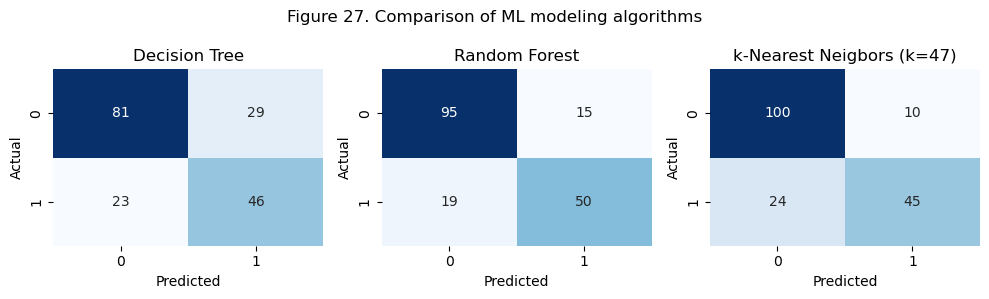

In [63]:
# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(10, 3))

# Plot the first heatmap (Decision Tree)
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axs[0])
axs[0].set_xlabel('Predicted')
axs[0].set_ylabel('Actual')
axs[0].set_title('Decision Tree')

# Plot the second heatmap (Random Forest)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axs[1])
axs[1].set_xlabel('Predicted')
axs[1].set_ylabel('Actual')
axs[1].set_title('Random Forest')

# Plot the third heatmap (kNN)
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axs[2])
axs[2].set_xlabel('Predicted')
axs[2].set_ylabel('Actual')
axs[2].set_title(f'k-Nearest Neigbors (k={k})')

# Title for figure
fig.suptitle('Figure 27. Comparison of ML modeling algorithms')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

### 4.5 Conclusion

Summarize your findings and provide insights into which model is most suitable for predicting Titanic passenger survival based on the dataset.

It seem like **Random Forest and k-Nearest Neigbors algorithms predict survivors equally well**. There is small differences in one direction and the other. I should get to know more on different numbers used in evaluation. For example I should get answers for this questions.
- What is the difference between precision, accuracy and f1-score?

Right now I don't have the answer... if i have time i will come back to this later.

If I have to choose now which model I should use, I would take consider my comparison with file sizes of models. Titanic dataset is relatively small, but in bigger training datasets Random Forest might grow bigger. I'm not sure if it can be so big that it will be really a problem. On the other hand if we want to optimize our use of resourses the **kNN model will be our choice** in this situation.

## Notes

**This is not included to the project. I just continued by comparing more different ML-models...**

... so feel free to continue reading :)

I made another version of this implementation where I kept PassengerId as index column. It was not included the data given for the model above. Results of prediction precisions were even worse than this what I got now. It doesn't make sense to me if we think what kind of data PassengerId really is. As I mentioned before it is just numbers in ascending order. How it can make predictions better? This must be a coincidence. Or is this some appearance of overfitting? What I can learn from creating model models and compare them all. I have to figure this out and make more test because otherwise I won't sleep ;)

Next I will try to do models with smaller amount of features. I keep passengerId as index column and use only few most important columns as features. Idea is to start using **forward** method instead of **backward** method. I know that now when I started with backward method I could continue by deleting one feature and see if results are getting better or worse. But at first I just want to test what is the difference with (almost) all features and min features. In the end of this interesting experiment I hope my results will get better than 0.81.

In [64]:
X.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'HasCabin', 'FamilySize', 'Deck', 'Title'],
      dtype='object')

In [65]:
X.set_index('PassengerId',inplace=True)
#X.head()

#### Number of features is 3: Pclass, Sex and Age

Let's create model based on these features.

In [66]:
X_1 = X.iloc[:,[0,1,2]]
X_1.head()

,Pclass,Sex,Age
PassengerId,,,
1,3,1,22.0
2,1,0,38.0
3,3,0,26.0
4,1,0,35.0
5,3,1,35.0


In [67]:
# change data with new features
X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size=0.2, random_state=42, stratify=y)


# MinMaxScaler() is used to scale data to the range 0 - 1.
mm_scaler = MinMaxScaler()
X_train = mm_scaler.fit(X_train).transform(X_train)
X_test = mm_scaler.transform(X_test)


# Create models

# DT
# Create model object
m_DT = DecisionTreeClassifier(random_state=42)
# Generate (fit) decision tree
m_DT.fit(X_train,y_train)
# Predict results
y_pred_DT = m_DT.predict(X_test)


# RF
# Create model
m_rf = RandomForestClassifier(n_estimators=100, random_state=42)
# Generate(fit) model
m_rf.fit(X_train, y_train)
# Predict results
y_pred_rf = m_rf.predict(X_test)


# kNN
# solve k
error_rate = []
for i in range(1,60): # test different k values 1-60
    knn = neighbors.KNeighborsClassifier(n_neighbors = i) 
    knn.fit(X_train, y_train) 
    y_pred_i = knn.predict(X_test)
    error_rate.append(np.mean(y_pred_i != y_test))  

k = error_rate.index(min(error_rate))

# Create model
m_knn = KNeighborsClassifier(n_neighbors=k)
# fit (generate) kNN
m_knn.fit(X_train, y_train)
# Make predictions whit model to te train data
y_pred_knn = m_knn.predict(X_test)

#### Evaluation with minimun features

In [68]:
print('Importance: DT')
importances = m_DT.feature_importances_

# sort importances in descending order
sorted_indices = importances.argsort()[::-1] # sort indices
sorted_importances = importances[sorted_indices] # use indices to sort importances

# loop importances
for i in range(len(sorted_importances)):
    print("feature: %12s - relative importance: %4.1f %%" % (X.columns[sorted_indices[i]], sorted_importances[i] * 100))


print('Importance: RF')
importances = m_rf.feature_importances_

# sort importances in descending order
sorted_indices = importances.argsort()[::-1] # sort indices
sorted_importances = importances[sorted_indices] # use indices to sort importances

# loop importances
for i in range(len(sorted_importances)):
    print("feature: %12s - relative importance: %4.1f %%" % (X.columns[sorted_indices[i]], sorted_importances[i] * 100))

Importance: DT
feature:          Sex - relative importance: 44.6 %
feature:          Age - relative importance: 37.1 %
feature:       Pclass - relative importance: 18.3 %
Importance: RF
feature:          Age - relative importance: 43.5 %
feature:          Sex - relative importance: 39.9 %
feature:       Pclass - relative importance: 16.7 %


In [69]:
import joblib
import os

models = [m_DT, m_rf, m_knn]

for i in models:    
    # Serialize model to file
    joblib.dump(i, f'{i}.pkl')

    # Save the size of file
    file_size = os.path.getsize(f'{i}.pkl')

    print(f'Size of {i} model: {round(file_size/1000)} KB.')

Size of DecisionTreeClassifier(random_state=42) model: 20 KB.
Size of RandomForestClassifier(random_state=42) model: 1441 KB.
Size of KNeighborsClassifier(n_neighbors=2) model: 49 KB.


In [70]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_DT)
conf_matrix_dt = confusion_matrix(y_test, y_pred_DT) # use sklearn own confusion matrix function.
class_report = classification_report(y_test, y_pred_DT)

print(f'Accuracy of decision tree: {accuracy:.2f}')

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report = classification_report(y_test, y_pred_rf)

print(f'Accuracy of Random Forest: {accuracy:.2f}')

# Evaluate the kNN model
accuracy = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
class_report = classification_report(y_test, y_pred_knn)

print(f'Accuracy of kNN: {accuracy:.2f}')

Accuracy of decision tree: 0.80
Accuracy of Random Forest: 0.80
Accuracy of kNN: 0.81


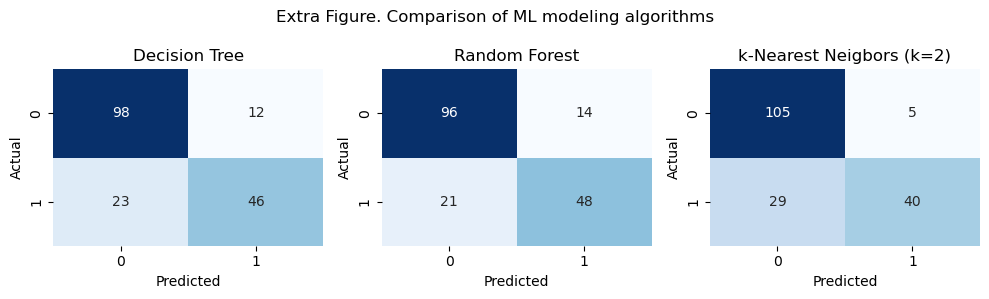

In [71]:
# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(10, 3))

# Plot the first heatmap (Decision Tree)
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axs[0])
axs[0].set_xlabel('Predicted')
axs[0].set_ylabel('Actual')
axs[0].set_title('Decision Tree')

# Plot the second heatmap (Random Forest)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axs[1])
axs[1].set_xlabel('Predicted')
axs[1].set_ylabel('Actual')
axs[1].set_title('Random Forest')

# Plot the third heatmap (kNN)
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axs[2])
axs[2].set_xlabel('Predicted')
axs[2].set_ylabel('Actual')
axs[2].set_title(f'k-Nearest Neigbors (k={k})')

# Title for figure
fig.suptitle('Extra Figure. Comparison of ML modeling algorithms')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

Okay... Accuracy points are even. Predictions are quite good I think... Lets continue by adding one feature by one. For this I will create function which generate all three models and adds features one by one... This could be a mess but lets try... Also I encode all columns for this so it would be even more excited...

In [72]:
# Decode all columns for ML-model

temp = df.select_dtypes(include=['object'])

df[temp.columns] = df[temp.columns].apply(preprocessing.LabelEncoder().fit_transform)

df.set_index('PassengerId',inplace=True)
#df.dtypes

## Function for forward method

Purpose for this is to find the best possible implementation for Titaninc datasets survaval prediction model.

Function generates all three models from different amount of features. Unfortunately it do not iterate all possible variations of features.

Maybe this is useful in other situations in future as well.

In [73]:
# Author: Kallepesko
# Feel free to use.

#from sklearn.compose import ColumnTransformer
#from sklearn.linear_model import LinearRegression
#from sklearn.metrics import mean_squared_error, mean_absolute_error
#from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import OneHotEncoder
#from sklearn.preprocessing import MinMaxScaler
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn import neighbors

# Iterates all features adding new feature for each iteation and 
# implement three different ML- models for preprocessed and encoded dataframe.

def forward_method_impl():
    lst = []
    X_1 = df.select_dtypes(include=['float64','int64','int32']).drop(['Survived'],axis=1)
    y = df['Survived']
    
    # Collect accuracys
    dt_accuracys = {}
    rf_accuracys = {}
    knn_accuracys = {}
    
    print(f'Information from the run.\nIn data is {len(X_1.columns)} different features which are {X_1.columns}.')
    print('********************************************************************************')
    
    for i in range(len(X_1.columns)):
        lst.append(i)
        print(f'Round {i+1}: Start!')
        # Select features. Every round add one feature.
        # Features will be from 2 to 15
        print(f'Round {i+1}: indices {lst}.')
        # This was hard to understand. But jep.. inside loop you have to use temporary X and X_1 is the one which was just assigned...
        X_temp = X_1.iloc[:,lst]
        print(f'Round {i+1}: Selected features are {X_1.columns}')

        # change data with new features
        X_train, X_test, y_train, y_test = train_test_split(X_temp, y, test_size=0.2, random_state=42, stratify=y)
        
        # MinMaxScaler() is used to scale data to the range 0 - 1.
        mm_scaler = MinMaxScaler()
        X_train = mm_scaler.fit(X_train).transform(X_train)
        X_test = mm_scaler.transform(X_test)

        print(f'Round {i+1}: Data splitted and scaled...')
        
        # Create models

        # DT
        # Create model object
        m_DT = DecisionTreeClassifier(random_state=42)
        # Generate (fit) decision tree
        m_DT.fit(X_train,y_train)
        # Predict results
        y_pred_DT = m_DT.predict(X_test)


        # RF
        # Create model
        m_rf = RandomForestClassifier(n_estimators=100, random_state=42)
        # Generate(fit) model
        m_rf.fit(X_train, y_train)
        # Predict results
        y_pred_rf = m_rf.predict(X_test)


        # kNN
        # solve k
        error_rate = []
        for j in range(1,60): # test different k values 1-60
            knn = neighbors.KNeighborsClassifier(n_neighbors = j) 
            knn.fit(X_train, y_train) 
            y_pred_i = knn.predict(X_test)
            error_rate.append(np.mean(y_pred_i != y_test))  
        k = error_rate.index(min(error_rate))
        
        # k-value cannot be 0.
        if k == 0:
            k = 1
        print(f'k-value is: {k}.')
        
        # Create model
        m_knn = KNeighborsClassifier(n_neighbors=k)
        # fit (generate) kNN
        m_knn.fit(X_train, y_train)
        # Make predictions whit model to te train data
        y_pred_knn = m_knn.predict(X_test)
        
        print(f'Round {i+1}: ML models created...\n Round {i+1}: Evaluate results.')
        
        
        print('Importance: DT')
        importances = m_DT.feature_importances_
        # sort importances in descending order
        sorted_indices = importances.argsort()[::-1] # sort indices
        sorted_importances = importances[sorted_indices] # use indices to sort importances
        # loop importances
        for i in range(len(sorted_importances)):
            print("feature: %12s - relative importance: %4.1f %%" % (X_1.columns[sorted_indices[i]], sorted_importances[i] * 100))

        print('Importance: RF')
        importances = m_rf.feature_importances_
        # sort importances in descending order
        sorted_indices = importances.argsort()[::-1] # sort indices
        sorted_importances = importances[sorted_indices] # use indices to sort importances
        # loop importances
        for i in range(len(sorted_importances)):
            print("feature: %12s - relative importance: %4.1f %%" % (X_1.columns[sorted_indices[i]], sorted_importances[i] * 100))

        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred_DT)
        #dt_accuracys.append(accuracy) # append to list for comparison
        # Add to collection
        val = {i : accuracy}
        dt_accuracys.update(val)
        conf_matrix_dt = confusion_matrix(y_test, y_pred_DT) # use sklearn own confusion matrix function.
        print(f'Accuracy of decision tree: {accuracy:.2f}')

        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred_rf)
        #rf_accuracys.append(accuracy) # append to list for comparison
        # Add to collection
        val = {i : accuracy}
        rf_accuracys.update(val)
        conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
        print(f'Accuracy of Random Forest: {accuracy:.2f}')

        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred_knn)
        #knn_accuracys.append(accuracy) # append to list for comparison
        # Add to collection
        val = {i : accuracy}
        knn_accuracys.update(val)
        conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
        print(f'Accuracy of kNN: {accuracy:.2f}')
        
        # Create subplots
        fig, axs = plt.subplots(1, 3, figsize=(10, 3))

        # Plot the first heatmap (Decision Tree)
        sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axs[0])
        axs[0].set_xlabel('Predicted')
        axs[0].set_ylabel('Actual')
        axs[0].set_title('Decision Tree')

        # Plot the second heatmap (Random Forest)
        sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axs[1])
        axs[1].set_xlabel('Predicted')
        axs[1].set_ylabel('Actual')
        axs[1].set_title('Random Forest')

        # Plot the third heatmap (kNN)
        sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axs[2])
        axs[2].set_xlabel('Predicted')
        axs[2].set_ylabel('Actual')
        axs[2].set_title(f'k-Nearest Neigbors (k={k})')

        # Title for figure
        fig.suptitle(f'Sekoilu figure from round {i+1}. Comparison of ML modeling algorithms')

        # Adjust layout
        plt.tight_layout()

        # Show the plot
        plt.show()
        
        print(f' End of round {i+1}.\n********************************************************************************')
        
    #print(f'Desicion tree accuracys: {dt_accuracys}\n')
    #print(f'Random Forest accuracys: {rf_accuracys}\n')
    #print(f'kNN accuracys: {knn_accuracys}\n')
    
    # Print best results:
    print(f'Desicion Tree best result:{max(dt_accuracys.items(), key=lambda x: x[1])}')
    print(f'Random Forest best result:{max(rf_accuracys.items(), key=lambda x: x[1])}')
    print(f'kNN best result:{max(knn_accuracys.items(), key=lambda x: x[1])}')
    

Information from the run.
In data is 15 different features which are Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'HasCabin', 'TicketNumber', 'FamilySize', 'Deck',
       'Title'],
      dtype='object').
********************************************************************************
Round 1: Start!
Round 1: indices [0].
Round 1: Selected features are Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'HasCabin', 'TicketNumber', 'FamilySize', 'Deck',
       'Title'],
      dtype='object')
Round 1: Data splitted and scaled...
k-value is: 1.
Round 1: ML models created...
 Round 1: Evaluate results.
Importance: DT
feature:       Pclass - relative importance: 100.0 %
Importance: RF
feature:       Pclass - relative importance: 100.0 %
Accuracy of decision tree: 0.64
Accuracy of Random Forest: 0.64
Accuracy of kNN: 0.64


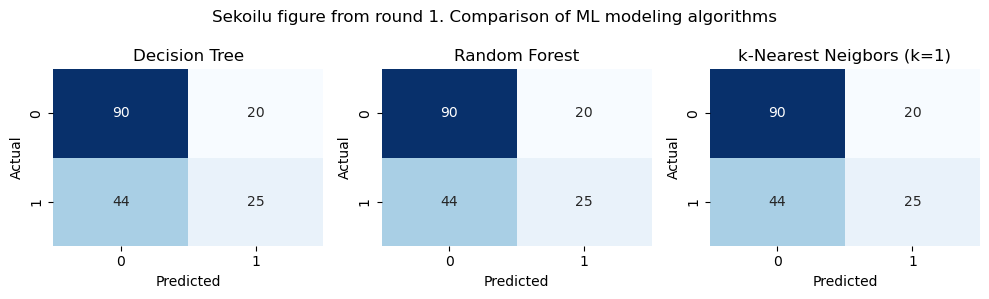

 End of round 1.
********************************************************************************
Round 2: Start!
Round 2: indices [0, 1].
Round 2: Selected features are Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'HasCabin', 'TicketNumber', 'FamilySize', 'Deck',
       'Title'],
      dtype='object')
Round 2: Data splitted and scaled...
k-value is: 11.
Round 2: ML models created...
 Round 2: Evaluate results.
Importance: DT
feature:         Name - relative importance: 87.9 %
feature:       Pclass - relative importance: 12.1 %
Importance: RF
feature:         Name - relative importance: 87.2 %
feature:       Pclass - relative importance: 12.8 %
Accuracy of decision tree: 0.56
Accuracy of Random Forest: 0.56
Accuracy of kNN: 0.68


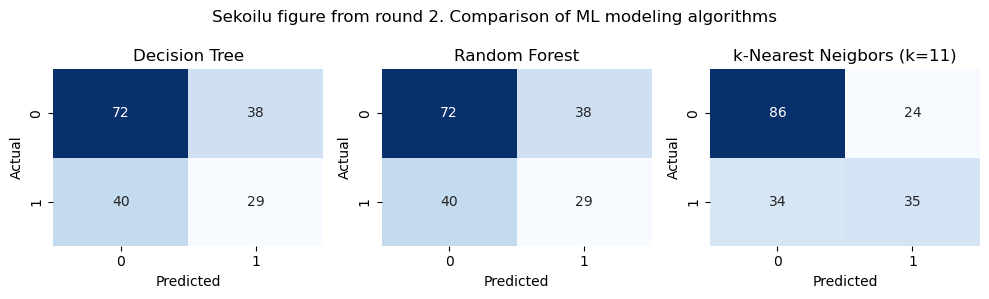

 End of round 2.
********************************************************************************
Round 3: Start!
Round 3: indices [0, 1, 2].
Round 3: Selected features are Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'HasCabin', 'TicketNumber', 'FamilySize', 'Deck',
       'Title'],
      dtype='object')
Round 3: Data splitted and scaled...
k-value is: 9.
Round 3: ML models created...
 Round 3: Evaluate results.
Importance: DT
feature:         Name - relative importance: 59.0 %
feature:          Sex - relative importance: 30.2 %
feature:       Pclass - relative importance: 10.8 %
Importance: RF
feature:         Name - relative importance: 59.9 %
feature:          Sex - relative importance: 28.4 %
feature:       Pclass - relative importance: 11.7 %
Accuracy of decision tree: 0.74
Accuracy of Random Forest: 0.75
Accuracy of kNN: 0.80


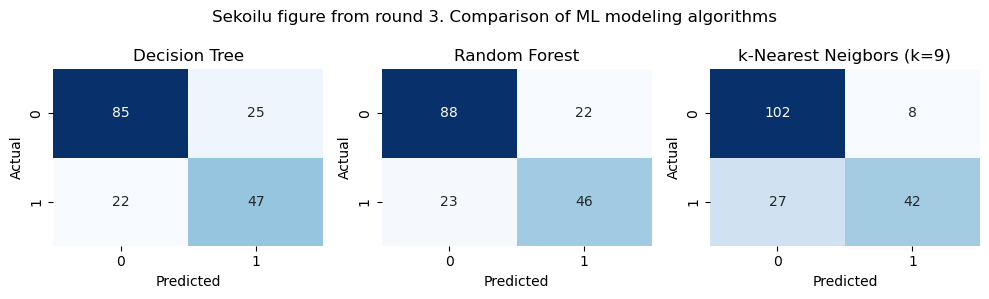

 End of round 3.
********************************************************************************
Round 4: Start!
Round 4: indices [0, 1, 2, 3].
Round 4: Selected features are Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'HasCabin', 'TicketNumber', 'FamilySize', 'Deck',
       'Title'],
      dtype='object')
Round 4: Data splitted and scaled...
k-value is: 2.
Round 4: ML models created...
 Round 4: Evaluate results.
Importance: DT
feature:         Name - relative importance: 35.9 %
feature:          Sex - relative importance: 30.2 %
feature:          Age - relative importance: 22.5 %
feature:       Pclass - relative importance: 11.4 %
Importance: RF
feature:         Name - relative importance: 35.1 %
feature:          Sex - relative importance: 29.5 %
feature:          Age - relative importance: 23.7 %
feature:       Pclass - relative importance: 11.7 %
Accuracy of decision tree: 0.73
Accuracy of Random Forest: 0.79
Accuracy of 

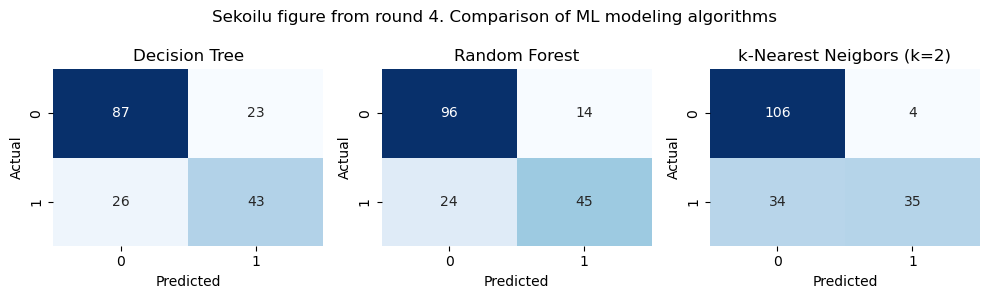

 End of round 4.
********************************************************************************
Round 5: Start!
Round 5: indices [0, 1, 2, 3, 4].
Round 5: Selected features are Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'HasCabin', 'TicketNumber', 'FamilySize', 'Deck',
       'Title'],
      dtype='object')
Round 5: Data splitted and scaled...
k-value is: 39.
Round 5: ML models created...
 Round 5: Evaluate results.
Importance: DT
feature:         Name - relative importance: 34.4 %
feature:          Sex - relative importance: 30.2 %
feature:          Age - relative importance: 21.0 %
feature:       Pclass - relative importance: 11.1 %
feature:        SibSp - relative importance:  3.4 %
Importance: RF
feature:         Name - relative importance: 31.5 %
feature:          Sex - relative importance: 28.6 %
feature:          Age - relative importance: 23.4 %
feature:       Pclass - relative importance: 11.5 %
feature:        SibS

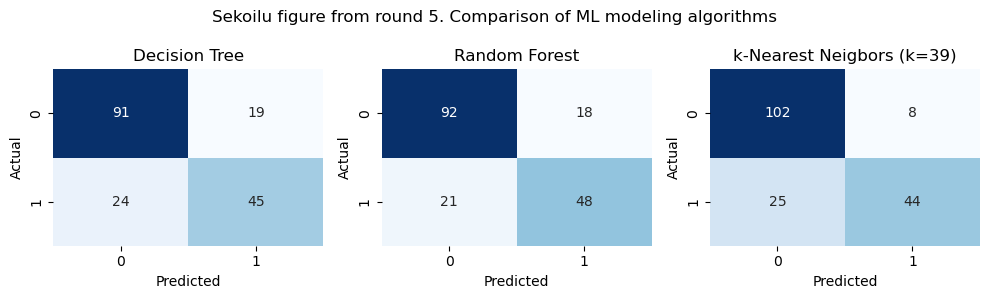

 End of round 5.
********************************************************************************
Round 6: Start!
Round 6: indices [0, 1, 2, 3, 4, 5].
Round 6: Selected features are Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'HasCabin', 'TicketNumber', 'FamilySize', 'Deck',
       'Title'],
      dtype='object')
Round 6: Data splitted and scaled...
k-value is: 27.
Round 6: ML models created...
 Round 6: Evaluate results.
Importance: DT
feature:         Name - relative importance: 33.9 %
feature:          Sex - relative importance: 30.2 %
feature:          Age - relative importance: 20.2 %
feature:       Pclass - relative importance: 11.3 %
feature:        SibSp - relative importance:  2.8 %
feature:        Parch - relative importance:  1.7 %
Importance: RF
feature:         Name - relative importance: 30.0 %
feature:          Sex - relative importance: 26.6 %
feature:          Age - relative importance: 22.7 %
feature:       Pc

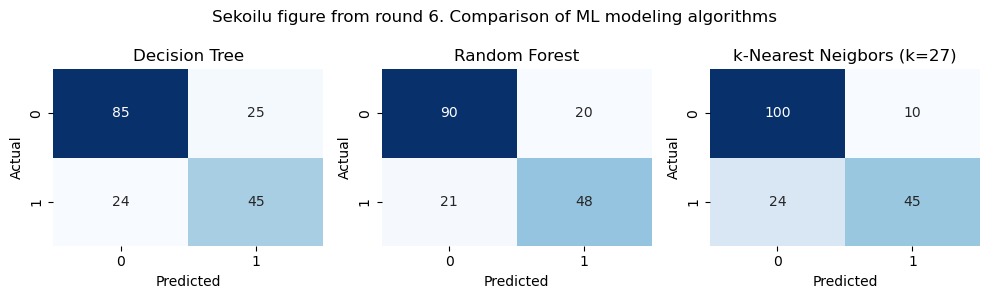

 End of round 6.
********************************************************************************
Round 7: Start!
Round 7: indices [0, 1, 2, 3, 4, 5, 6].
Round 7: Selected features are Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'HasCabin', 'TicketNumber', 'FamilySize', 'Deck',
       'Title'],
      dtype='object')
Round 7: Data splitted and scaled...
k-value is: 29.
Round 7: ML models created...
 Round 7: Evaluate results.
Importance: DT
feature:          Sex - relative importance: 30.2 %
feature:       Ticket - relative importance: 24.1 %
feature:         Name - relative importance: 17.7 %
feature:          Age - relative importance: 16.3 %
feature:       Pclass - relative importance:  8.5 %
feature:        SibSp - relative importance:  2.5 %
feature:        Parch - relative importance:  0.7 %
Importance: RF
feature:          Sex - relative importance: 25.9 %
feature:       Ticket - relative importance: 22.4 %
feature:      

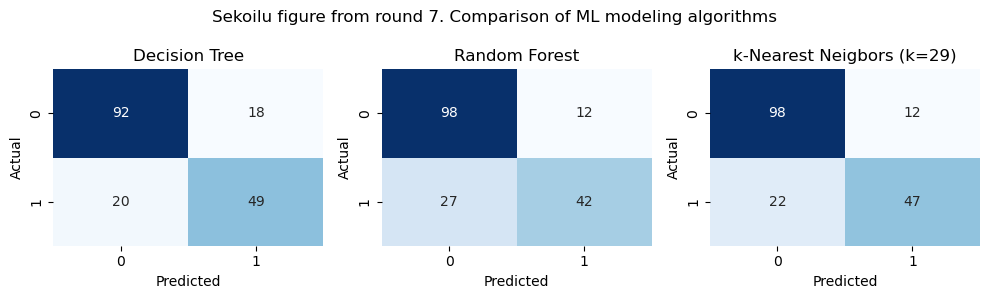

 End of round 7.
********************************************************************************
Round 8: Start!
Round 8: indices [0, 1, 2, 3, 4, 5, 6, 7].
Round 8: Selected features are Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'HasCabin', 'TicketNumber', 'FamilySize', 'Deck',
       'Title'],
      dtype='object')
Round 8: Data splitted and scaled...
k-value is: 26.
Round 8: ML models created...
 Round 8: Evaluate results.
Importance: DT
feature:          Sex - relative importance: 30.2 %
feature:       Ticket - relative importance: 17.4 %
feature:          Age - relative importance: 14.7 %
feature:         Fare - relative importance: 13.9 %
feature:         Name - relative importance: 11.5 %
feature:       Pclass - relative importance:  8.3 %
feature:        SibSp - relative importance:  2.4 %
feature:        Parch - relative importance:  1.7 %
Importance: RF
feature:          Sex - relative importance: 24.5 %
feature:   

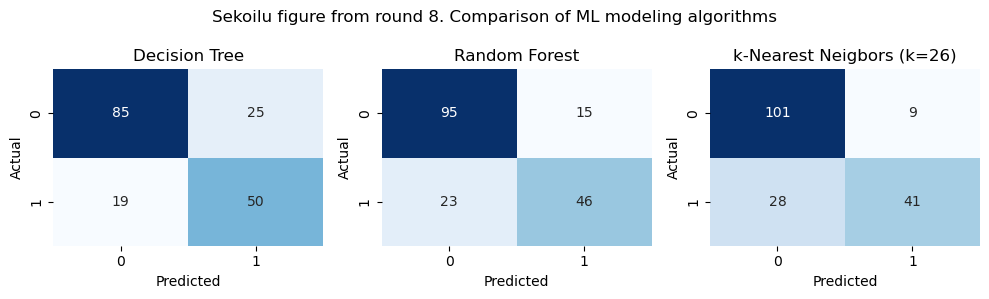

 End of round 8.
********************************************************************************
Round 9: Start!
Round 9: indices [0, 1, 2, 3, 4, 5, 6, 7, 8].
Round 9: Selected features are Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'HasCabin', 'TicketNumber', 'FamilySize', 'Deck',
       'Title'],
      dtype='object')
Round 9: Data splitted and scaled...
k-value is: 26.
Round 9: ML models created...
 Round 9: Evaluate results.
Importance: DT
feature:          Sex - relative importance: 30.2 %
feature:         Name - relative importance: 13.7 %
feature:       Ticket - relative importance: 13.6 %
feature:          Age - relative importance: 13.1 %
feature:         Fare - relative importance: 12.1 %
feature:       Pclass - relative importance:  7.5 %
feature:        Cabin - relative importance:  7.4 %
feature:        Parch - relative importance:  1.4 %
feature:        SibSp - relative importance:  1.0 %
Importance: RF
feature:

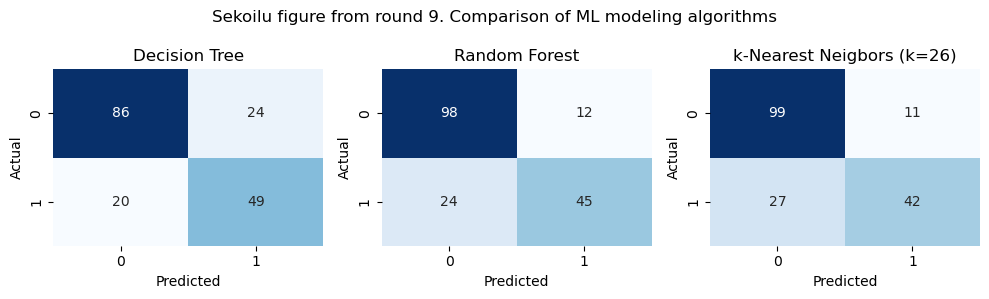

 End of round 9.
********************************************************************************
Round 10: Start!
Round 10: indices [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
Round 10: Selected features are Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'HasCabin', 'TicketNumber', 'FamilySize', 'Deck',
       'Title'],
      dtype='object')
Round 10: Data splitted and scaled...
k-value is: 48.
Round 10: ML models created...
 Round 10: Evaluate results.
Importance: DT
feature:          Sex - relative importance: 30.2 %
feature:       Ticket - relative importance: 14.3 %
feature:         Name - relative importance: 14.3 %
feature:          Age - relative importance: 12.9 %
feature:         Fare - relative importance:  9.1 %
feature:       Pclass - relative importance:  8.1 %
feature:        Cabin - relative importance:  7.2 %
feature:     Embarked - relative importance:  2.5 %
feature:        SibSp - relative importance:  1.5 %
feature:      

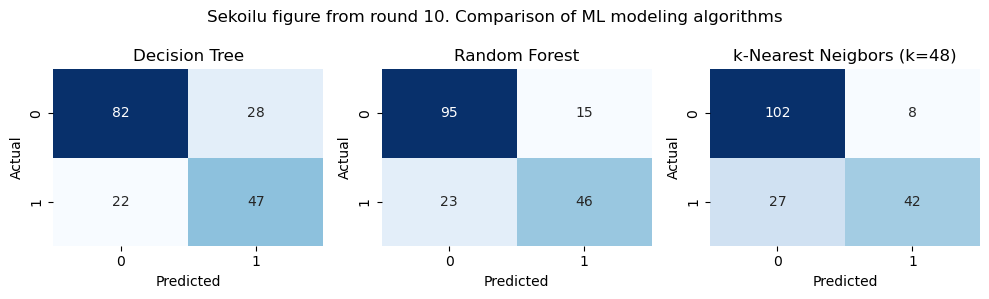

 End of round 10.
********************************************************************************
Round 11: Start!
Round 11: indices [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10].
Round 11: Selected features are Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'HasCabin', 'TicketNumber', 'FamilySize', 'Deck',
       'Title'],
      dtype='object')
Round 11: Data splitted and scaled...
k-value is: 33.
Round 11: ML models created...
 Round 11: Evaluate results.
Importance: DT
feature:          Sex - relative importance: 30.2 %
feature:       Ticket - relative importance: 14.4 %
feature:         Name - relative importance: 12.6 %
feature:          Age - relative importance: 11.8 %
feature:         Fare - relative importance: 10.4 %
feature:       Pclass - relative importance:  8.3 %
feature:        Cabin - relative importance:  7.7 %
feature:     Embarked - relative importance:  2.2 %
feature:        SibSp - relative importance:  1.8 %
feature: 

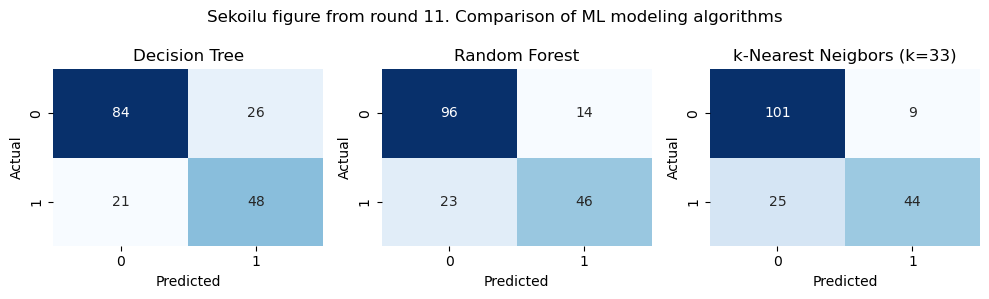

 End of round 11.
********************************************************************************
Round 12: Start!
Round 12: indices [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11].
Round 12: Selected features are Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'HasCabin', 'TicketNumber', 'FamilySize', 'Deck',
       'Title'],
      dtype='object')
Round 12: Data splitted and scaled...
k-value is: 31.
Round 12: ML models created...
 Round 12: Evaluate results.
Importance: DT
feature:          Sex - relative importance: 30.2 %
feature:         Name - relative importance: 12.4 %
feature:       Ticket - relative importance: 11.2 %
feature:          Age - relative importance: 10.5 %
feature:         Fare - relative importance: 10.0 %
feature:       Pclass - relative importance:  7.5 %
feature:        Cabin - relative importance:  7.0 %
feature: TicketNumber - relative importance:  6.7 %
feature:     Embarked - relative importance:  2.6 %
featu

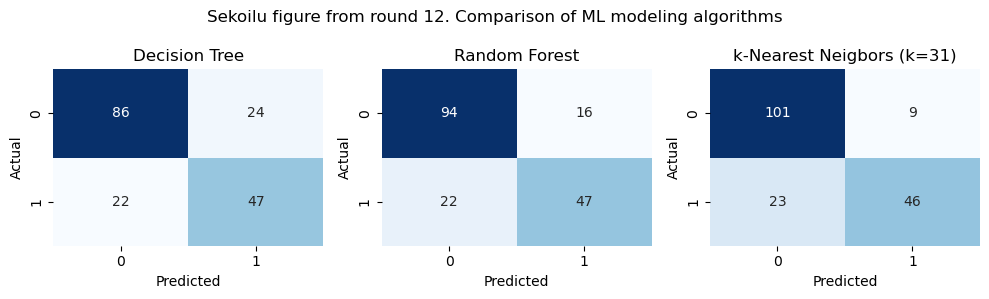

 End of round 12.
********************************************************************************
Round 13: Start!
Round 13: indices [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12].
Round 13: Selected features are Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'HasCabin', 'TicketNumber', 'FamilySize', 'Deck',
       'Title'],
      dtype='object')
Round 13: Data splitted and scaled...
k-value is: 32.
Round 13: ML models created...
 Round 13: Evaluate results.
Importance: DT
feature:          Sex - relative importance: 30.2 %
feature:         Name - relative importance: 12.3 %
feature:          Age - relative importance: 10.8 %
feature:       Ticket - relative importance: 10.7 %
feature: TicketNumber - relative importance:  9.4 %
feature:       Pclass - relative importance:  7.5 %
feature:        Cabin - relative importance:  7.5 %
feature:         Fare - relative importance:  6.5 %
feature:   FamilySize - relative importance:  3.3 %
f

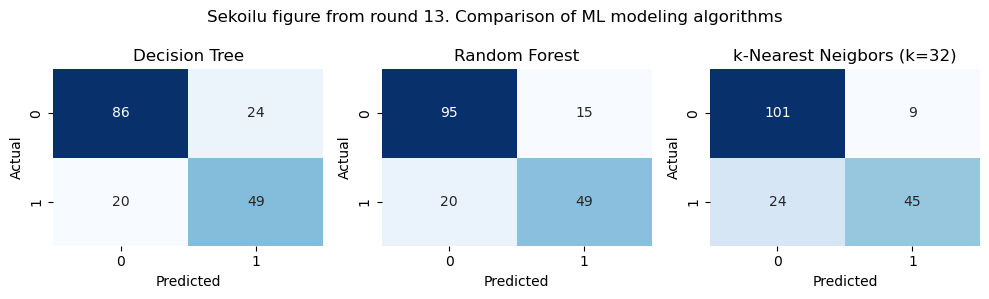

 End of round 13.
********************************************************************************
Round 14: Start!
Round 14: indices [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13].
Round 14: Selected features are Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'HasCabin', 'TicketNumber', 'FamilySize', 'Deck',
       'Title'],
      dtype='object')
Round 14: Data splitted and scaled...
k-value is: 31.
Round 14: ML models created...
 Round 14: Evaluate results.
Importance: DT
feature:          Sex - relative importance: 30.2 %
feature:         Name - relative importance: 10.9 %
feature:          Age - relative importance: 10.8 %
feature:       Ticket - relative importance:  9.7 %
feature: TicketNumber - relative importance:  8.6 %
feature:         Fare - relative importance:  8.0 %
feature:       Pclass - relative importance:  7.5 %
feature:        Cabin - relative importance:  7.1 %
feature:   FamilySize - relative importance:  3.3

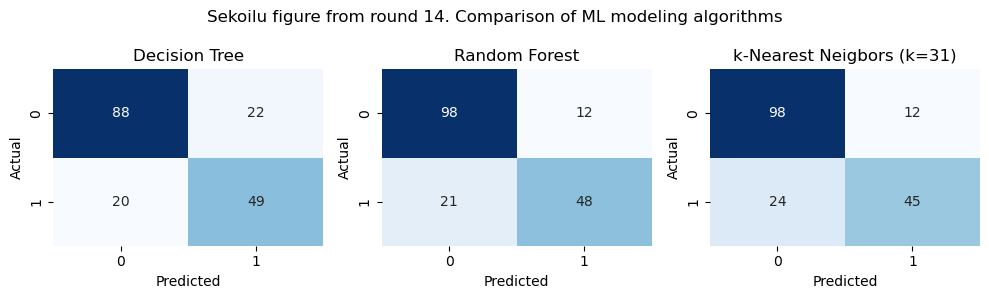

 End of round 14.
********************************************************************************
Round 15: Start!
Round 15: indices [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14].
Round 15: Selected features are Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'HasCabin', 'TicketNumber', 'FamilySize', 'Deck',
       'Title'],
      dtype='object')
Round 15: Data splitted and scaled...
k-value is: 4.
Round 15: ML models created...
 Round 15: Evaluate results.
Importance: DT
feature:        Title - relative importance: 34.2 %
feature:       Ticket - relative importance: 11.9 %
feature:         Name - relative importance: 10.4 %
feature: TicketNumber - relative importance:  8.1 %
feature:       Pclass - relative importance:  7.6 %
feature:          Age - relative importance:  6.8 %
feature:         Fare - relative importance:  6.0 %
feature:        Cabin - relative importance:  5.5 %
feature:   FamilySize - relative importance:  

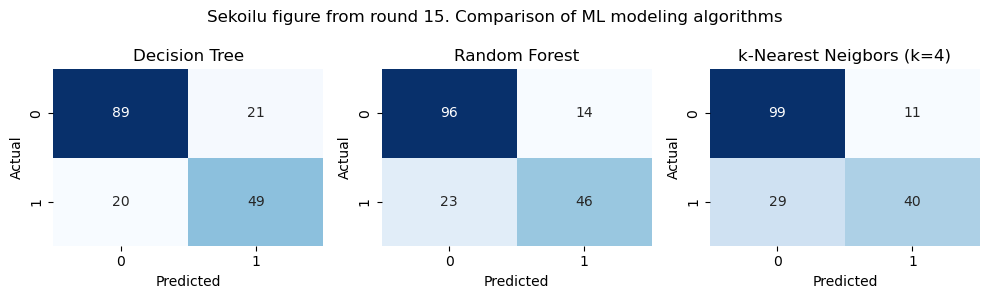

 End of round 15.
********************************************************************************
Desicion Tree best result:(6, 0.7877094972067039)
Random Forest best result:(13, 0.8156424581005587)
kNN best result:(11, 0.8212290502793296)


In [74]:
forward_method_impl()

#### Conclusion 

When data is well prepared it is very easy to generate ML models... Also I noticed that it is important to try different models and evaluate which is the best suited option for your implementation.

Not I can see that the **best result for this implementation is k-Nearest Neighbor from round 12** with features 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'HasCabin', 'TicketNumber', 'FamilySize', 'Deck'. Althou difference against my first implementation is not big. BUT my goal was to find a better solution. And **0.82 is better result than my first 0.81** :D

I don't know if it make any sence but this could be done even better/or complicated. I could easily arrange columns the way where the most important columns are ordered first and try loop this function again. Or it is possible just brute force all possible variations just like I just did with a smaller scale... Save all results to dictionary and get the max accuracy result from there.

Although this was a side plot from the task at hand, this was an interesting test and I learned a bit more programming and how easy is to implement ML models. Also I should read more theory of different models. Or take Machine learning course at spring 2024.

Thank you if you read this far :)